In [1]:
suppressPackageStartupMessages({
  library(future)
  library(Seurat)
  library(tidyverse)
  library(Seurat)
  library(ggplot2)
  library(ggrastr)   # for geom_point_rast()
  library(ggrepel)   # for geom_text_repel()
  library(dplyr)
  library(forcats)
  library(pals)      # for glasbey palette (distinct, color-blind-friendly)
  library(stringr)  
  library(RColorBrewer) # For generating high-quality color palettes
  library(cowplot)      # For the 'theme_cowplot' (a clean, minimal theme)
  library(clusterProfiler)
  library(org.Hs.eg.db)
  library(enrichplot)
})

Warning message:
“package ‘future’ was built under R version 4.4.3”


Warning message:
“package ‘Seurat’ was built under R version 4.4.3”
Warning message:
“package ‘SeuratObject’ was built under R version 4.4.3”
Warning message:
“package ‘sp’ was built under R version 4.4.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.4.3”
Warning message:
“package ‘tibble’ was built under R version 4.4.3”
Warning message:
“package ‘tidyr’ was built under R version 4.4.3”
Warning message:
“package ‘readr’ was built under R version 4.4.3”
Warning message:
“package ‘dplyr’ was built under R version 4.4.3”
Warning message:
“package ‘forcats’ was built under R version 4.4.3”
Warning message:
“package ‘lubridate’ was built under R version 4.4.3”
Warning message:
“package ‘ggrastr’ was built under R version 4.4.3”
Warning message:
“package ‘ggrepel’ was built under R version 4.4.3”
Warning message:
“package ‘pals’ was built under R version 4.4.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.4.3”
Warning message:
“package ‘cowplot’ 

In [2]:
# myeloid <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/subclusters/myeloid/myeloid_final_integrated.rds')
# myeloid

In [3]:
# # This command will access the SCT model information
# myeloid[["SCT"]]@SCTModel.list

In [3]:
myeloid_clean <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/subclusters/myeloid/myeloid_clean.rds')
myeloid_clean

An object of class Seurat 
69212 features across 94270 samples within 2 assays 
Active assay: SCT (30606 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap.harmony

In [5]:
# # This command will access the SCT model information
# myeloid_clean[["SCT"]]@SCTModel.list

In [ ]:
# # Ensure identities use the 0.08 resolution
# Idents(myeloid) <- "SCT_snn_res.0.08"

# # Clusters to remove
# remove_clusters <- c("8", "9", "10")

# # Subset to keep cells NOT in those clusters (create a new object to preserve original)
# myeloid_clean <- subset(myeloid, subset = !`SCT_snn_res.0.08` %in% remove_clusters)

# # Reset factor levels and identities
# myeloid_clean@meta.data$`SCT_snn_res.0.08` <- factor(myeloid_clean@meta.data$`SCT_snn_res.0.08`)
# Idents(myeloid_clean) <- "SCT_snn_res.0.08"

# # Quick sanity checks
# table(before = myeloid@meta.data$`SCT_snn_res.0.08`)
# table(after  = myeloid_clean@meta.data$`SCT_snn_res.0.08`)
# cat("Cells before:", ncol(myeloid), "\n")
# cat("Cells after: ", ncol(myeloid_clean), "\n")

before
    0     1     2     3     4     5     6     7     8     9    10    11 
25707 22753 10159  9421  7800  6503  5463  5158  3920  3456  2767  1306 

after
    0     1     2     3     4     5     6     7    11 
25707 22753 10159  9421  7800  6503  5463  5158  1306 

Cells before: 104413 
Cells after:  94270 


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


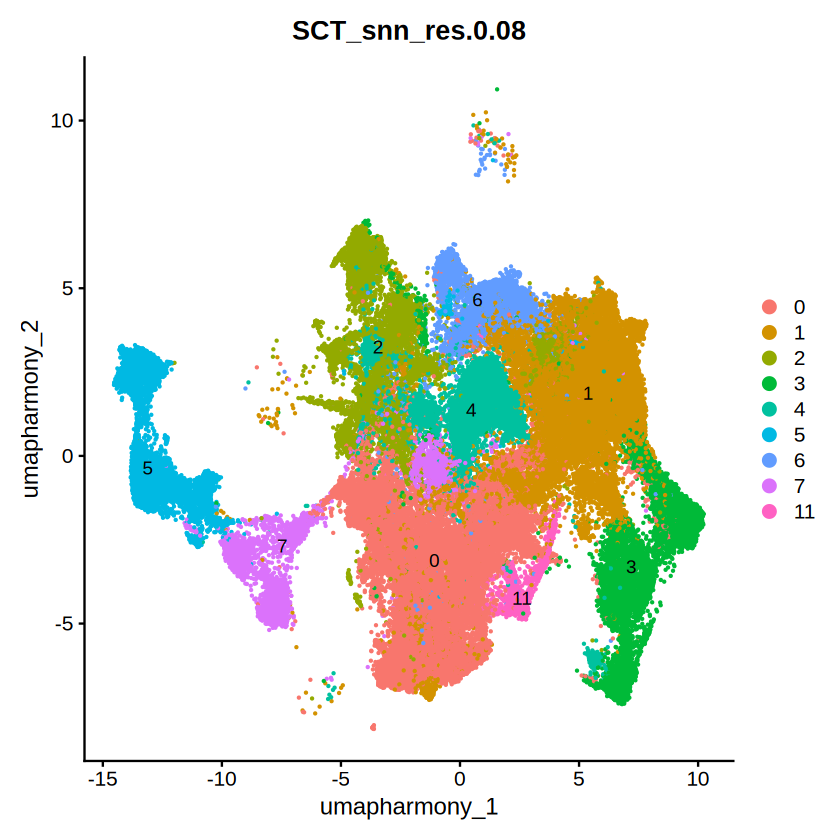

In [4]:
DimPlot(myeloid_clean, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.08', label = TRUE)

In [5]:
# saveRDS(myeloid_clean, '/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/subclusters/myeloid/myeloid_clean.rds')

In [6]:
DefaultAssay(myeloid) <- 'SCT'
myeloid

ERROR: Error: object 'myeloid' not found


In [ ]:
# # Remove the old SCT assay data and run SCTransform again on the clean object
# # This ensures the models are correct for the subsetted data
# myeloid_clean[["SCT"]] <- NULL # Optionally remove the old assay
# myeloid_clean <- SCTransform(myeloid_clean, assay = "RNA", verbose = FALSE)

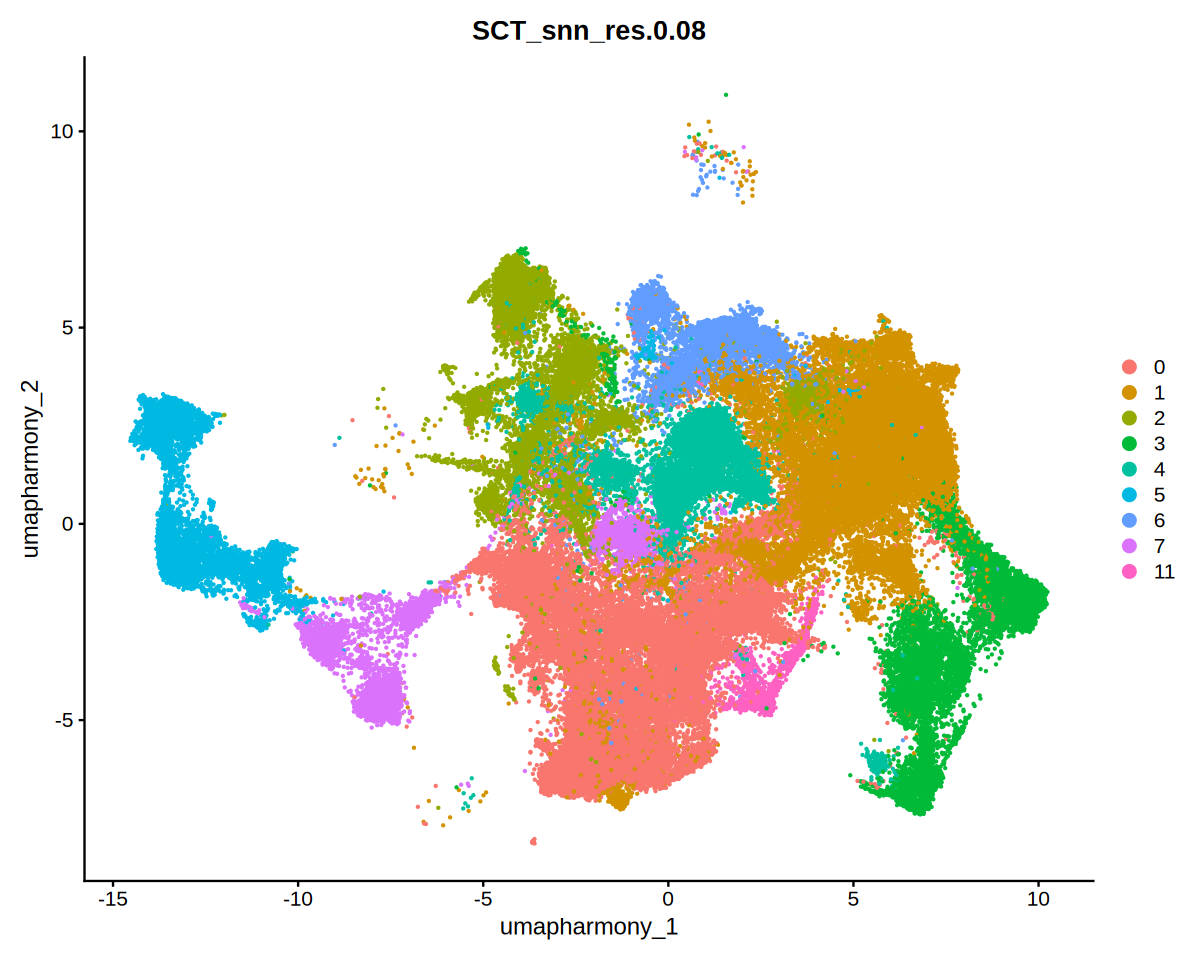

In [31]:
options(repr.plot.width = 10, repr.plot.height = 8)
DimPlot(myeloid_clean, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.08')

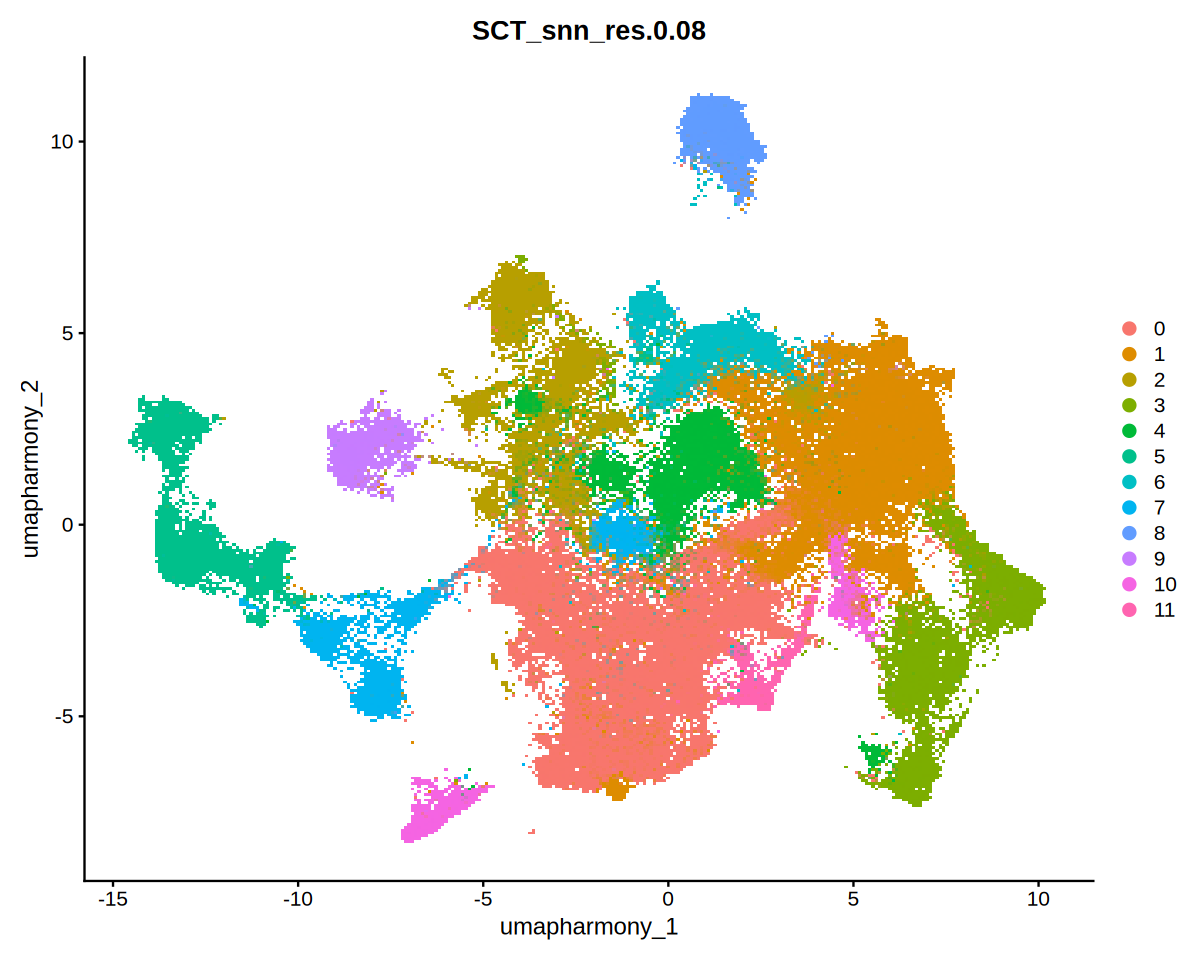

In [39]:
DimPlot(myeloid, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.08', raster = TRUE, raster.dpi = c(300, 300))

In [3]:
myeloid@meta.data |> head()

orig.ident  
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 PRJNA1125010
                                                                                        nCount_RNA
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1  1175     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1  4284     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 44655     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 29414     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1  3246     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 10869     
                                                                                        nFeature_RNA
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1  713        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 2090        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 6053        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 6000        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 1661        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 3658        
                                                                                        project_id  
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 PRJNA1125010
                                                                                        orig_sample_id                          
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 PRJNA1125010__filtered_feature_bc_matrix
                                                                                        sample_uid                                                          
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__S

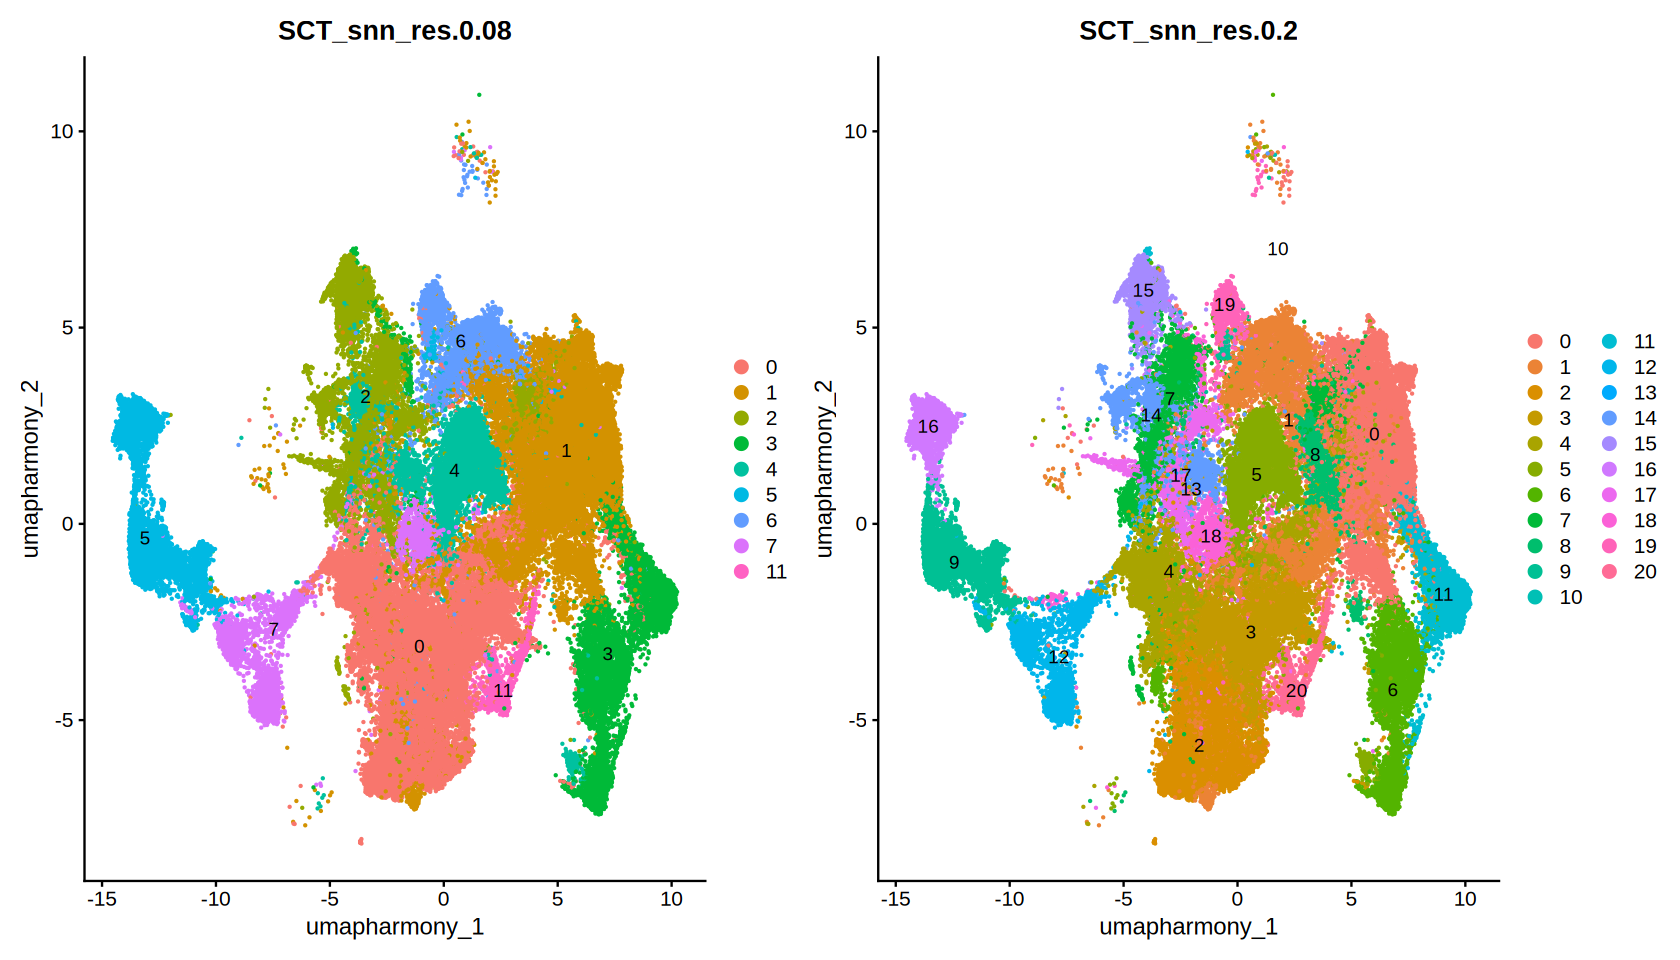

In [10]:
options(repr.plot.width = 14, repr.plot.height = 8)
p1 <- DimPlot(myeloid, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.08', label = TRUE)
p2 <- DimPlot(myeloid, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.2', label = TRUE)

p1 | p2 

In [28]:
myeloid <- PrepSCTFindMarkers(myeloid, assay = "SCT", verbose = TRUE)

Found 10 SCT models. Recorrecting SCT counts using minimum median counts: 1025



In [6]:
Idents(myeloid) <- "SCT_snn_res.0.2"

In [7]:
# Find all markers for all clusters
all_markers <- FindAllMarkers(
  object = myeloid,
  assay = "SCT",
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

Calculating cluster 0



Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20



In [8]:
cluster0 <- all_markers %>% filter(cluster == 0) %>% arrange(desc(avg_log2FC))
cluster1 <- all_markers %>% filter(cluster == 1) %>% arrange(desc(avg_log2FC))
cluster2 <- all_markers %>% filter(cluster == 2) %>% arrange(desc(avg_log2FC))
cluster3 <- all_markers %>% filter(cluster == 3) %>% arrange(desc(avg_log2FC))
cluster4 <- all_markers %>% filter(cluster == 4) %>% arrange(desc(avg_log2FC))
cluster5 <- all_markers %>% filter(cluster == 5) %>% arrange(desc(avg_log2FC))
cluster6 <- all_markers %>% filter(cluster == 6) %>% arrange(desc(avg_log2FC))
cluster7 <- all_markers %>% filter(cluster == 7) %>% arrange(desc(avg_log2FC))
cluster8 <- all_markers %>% filter(cluster == 8) %>% arrange(desc(avg_log2FC))
cluster9 <- all_markers %>% filter(cluster == 9) %>% arrange(desc(avg_log2FC))
cluster10 <- all_markers %>% filter(cluster == 10) %>% arrange(desc(avg_log2FC))
cluster11 <- all_markers %>% filter(cluster == 11) %>% arrange(desc(avg_log2FC))
cluster12 <- all_markers %>% filter(cluster == 12) %>% arrange(desc(avg_log2FC))
cluster13 <- all_markers %>% filter(cluster == 13) %>% arrange(desc(avg_log2FC))
cluster14 <- all_markers %>% filter(cluster == 14) %>% arrange(desc(avg_log2FC))
cluster15 <- all_markers %>% filter(cluster == 15) %>% arrange(desc(avg_log2FC))
cluster16 <- all_markers %>% filter(cluster == 16) %>% arrange(desc(avg_log2FC))
cluster17 <- all_markers %>% filter(cluster == 17) %>% arrange(desc(avg_log2FC))
cluster18 <- all_markers %>% filter(cluster == 18) %>% arrange(desc(avg_log2FC))
cluster19 <- all_markers %>% filter(cluster == 19) %>% arrange(desc(avg_log2FC))
cluster20 <- all_markers %>% filter(cluster == 20) %>% arrange(desc(avg_log2FC))

In [18]:
Idents(myeloid) <- 'SCT_snn_res.0.08'

In [ ]:
# Find all markers for all clusters
all_markers_2 <- FindAllMarkers(
  object = myeloid,
  assay = "SCT",
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

Calculating cluster 0



Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11



In [20]:
cluster0_2 <- all_markers_2 %>% filter(cluster == 0) %>% arrange(desc(avg_log2FC))
cluster1_2 <- all_markers_2 %>% filter(cluster == 1) %>% arrange(desc(avg_log2FC))
cluster2_2 <- all_markers_2 %>% filter(cluster == 2) %>% arrange(desc(avg_log2FC))
cluster3_2 <- all_markers_2 %>% filter(cluster == 3) %>% arrange(desc(avg_log2FC))
cluster4_2 <- all_markers_2 %>% filter(cluster == 4) %>% arrange(desc(avg_log2FC))
cluster5_2 <- all_markers_2 %>% filter(cluster == 5) %>% arrange(desc(avg_log2FC))
cluster6_2 <- all_markers_2 %>% filter(cluster == 6) %>% arrange(desc(avg_log2FC))
cluster7_2 <- all_markers_2 %>% filter(cluster == 7) %>% arrange(desc(avg_log2FC))
cluster8_2 <- all_markers_2 %>% filter(cluster == 8) %>% arrange(desc(avg_log2FC))
cluster9_2 <- all_markers_2 %>% filter(cluster == 9) %>% arrange(desc(avg_log2FC))
cluster10_2 <- all_markers_2 %>% filter(cluster == 10) %>% arrange(desc(avg_log2FC))
cluster11_2 <- all_markers_2 %>% filter(cluster == 11) %>% arrange(desc(avg_log2FC))

In [21]:
cluster11_2 |> head(20)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene     
SERPINE1   0.000000e+00 5.821118   0.998 0.087  0.000000e+00 11      SERPINE1 
HSPA1B2   1.679983e-225 2.620047   0.521 0.197 5.251123e-221 11      HSPA1B   
CCL4L23   1.549453e-122 2.397899   0.447 0.211 4.843124e-118 11      CCL4L2   
HSPA1A2   3.247898e-183 2.247859   0.593 0.283 1.015195e-178 11      HSPA1A   
LINC01736 1.210274e-188 2.246990   0.253 0.059 3.782954e-184 11      LINC01736
CCL3L33   7.471767e-107 2.210033   0.414 0.197 2.335450e-102 11      CCL3L3   
GLDN      1.316843e-174 2.088201   0.262 0.066 4.116055e-170 11      GLDN     
PLD4      1.167691e-185 2.082467   0.315 0.088 3.649853e-181 11      PLD4     
SYNDIG1   1.844710e-188 1.928827   0.294 0.075 5.766009e-184 11      SYNDIG1  
DNAJB12   6.535008e-119 1.919146   0.421 0.187 2.042647e-114 11      DNAJB1   
NR4A11     1.828788e-80 1.918767   0.343 0.163  5.716242e-76 11      NR4A1    
CCL43      5.144917e-87 1.915241   0.492 0.284  1.608147e-82 11      CCL4     
KLF22      3.910371e-80 1.914241   0.381 0.194  1.222265e-75 11      KLF2     
GADD45B4   7.514291e-52 1.871819   0.368 0.218  2.348742e-47 11      GADD45B  
HSPB11    1.327097e-104 1.870101   0.410 0.190 4.148108e-100 11      HSPB1    
JUN1      2.606633e-220 1.869855   0.701 0.335 8.147554e-216 11      JUN      
RHOB2     1.204886e-140 1.834417   0.478 0.211 3.766111e-136 11      RHOB     
LILRB4    3.507308e-154 1.815042   0.357 0.122 1.096279e-149 11      LILRB4   
OTUD1      3.876717e-73 1.777315   0.264 0.111  1.211746e-68 11      OTUD1    
EGR12     1.207026e-117 1.763655   0.446 0.206 3.772800e-113 11      EGR1

In [12]:
Idents(myeloid) <- 'SCT_snn_res.0.06'

In [13]:
# Find all markers for all clusters
all_markers_3 <- FindAllMarkers(
  object = myeloid,
  assay = "SCT",
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

Calculating cluster 0



Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



In [14]:
cluster0_3 <- all_markers_3 %>% filter(cluster == 0) %>% arrange(desc(avg_log2FC))
cluster1_3 <- all_markers_3 %>% filter(cluster == 1) %>% arrange(desc(avg_log2FC))
cluster2_3 <- all_markers_3 %>% filter(cluster == 2) %>% arrange(desc(avg_log2FC))
cluster3_3 <- all_markers_3 %>% filter(cluster == 3) %>% arrange(desc(avg_log2FC))
cluster4_3 <- all_markers_3 %>% filter(cluster == 4) %>% arrange(desc(avg_log2FC))
cluster5_3 <- all_markers_3 %>% filter(cluster == 5) %>% arrange(desc(avg_log2FC))
cluster6_3 <- all_markers_3 %>% filter(cluster == 6) %>% arrange(desc(avg_log2FC))

In [15]:
Idents(myeloid) <- "SCT_snn_res.0.04"

In [16]:
# Find all markers for all clusters
all_markers_4 <- FindAllMarkers(
  object = myeloid,
  assay = "SCT",
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

Calculating cluster 0



Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6



In [17]:
cluster0_4 <- all_markers_4 %>% filter(cluster == 0) %>% arrange(desc(avg_log2FC))
cluster1_4 <- all_markers_4 %>% filter(cluster == 1) %>% arrange(desc(avg_log2FC))
cluster2_4 <- all_markers_4 %>% filter(cluster == 2) %>% arrange(desc(avg_log2FC))
cluster3_4 <- all_markers_4 %>% filter(cluster == 3) %>% arrange(desc(avg_log2FC))
cluster4_4 <- all_markers_4 %>% filter(cluster == 4) %>% arrange(desc(avg_log2FC))
cluster5_4 <- all_markers_4 %>% filter(cluster == 5) %>% arrange(desc(avg_log2FC))
cluster6_4 <- all_markers_4 %>% filter(cluster == 6) %>% arrange(desc(avg_log2FC))
cluster7_4 <- all_markers_4 %>% filter(cluster == 7) %>% arrange(desc(avg_log2FC))
cluster8_4 <- all_markers_4 %>% filter(cluster == 8) %>% arrange(desc(avg_log2FC))

In [18]:
p3 <- DimPlot(myeloid, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.06', label = TRUE)
p4 <- DimPlot(myeloid, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.04', label = TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [ ]:
# 01: 0.2
# 02: 0.08
# 03: 0.06
# 04: 0.04

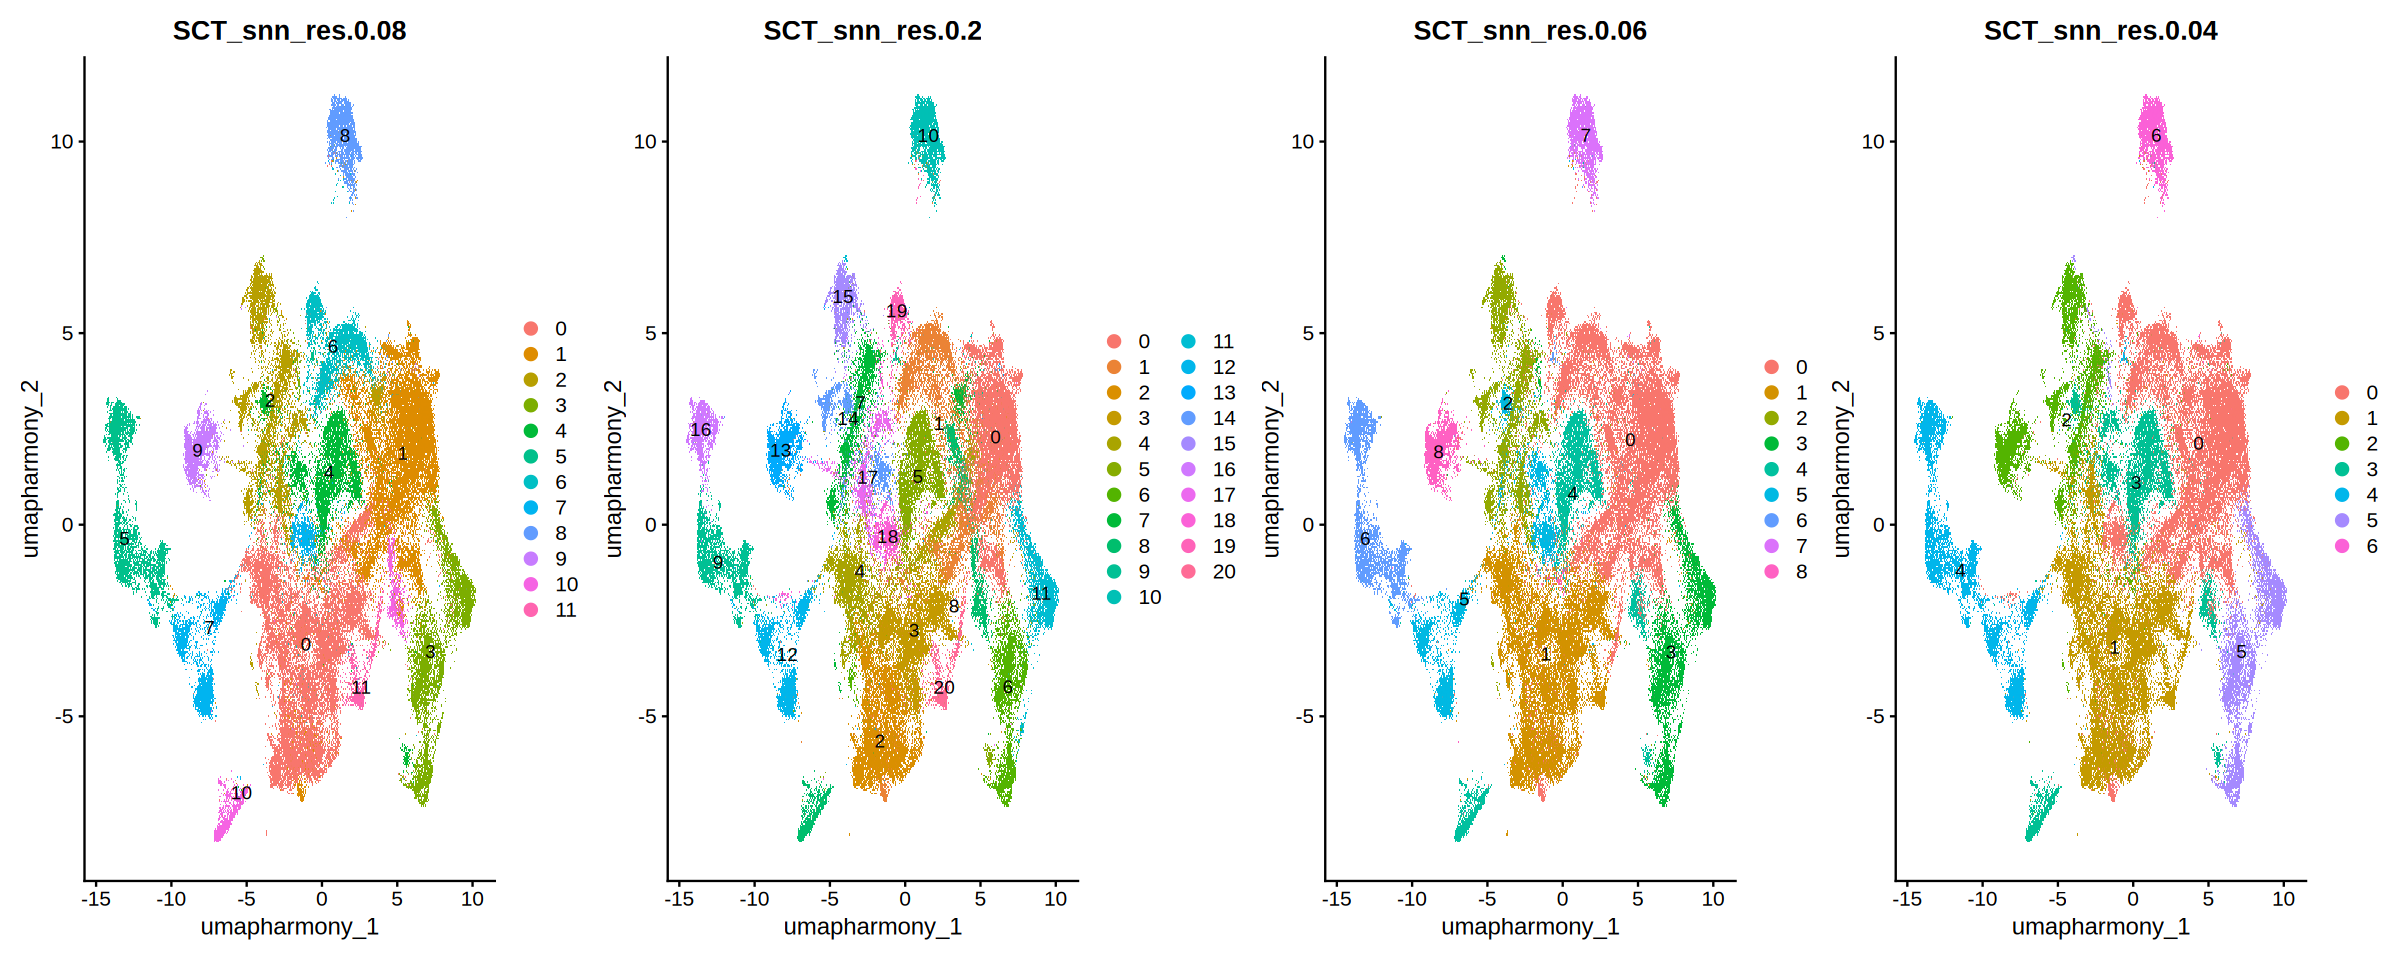

In [19]:
options(repr.plot.width = 20, repr.plot.height = 8)
p1 | p2 | p3 | p4

In [ ]:
# Apply for Res 0.08: Remove 8, 9, 10
# Cluster 0: 
# Cluster 1: Microglia/TAM
# Cluster 2: 
# Cluster 3: IFN_TAM 
# Cluster 4: Monocyte derived Macrophage
# Cluster 5: Neutrophil
# Cluster 6: SPP1_TAM
# Cluster 7: Mononcyte???
# Cluster 11: 


In [72]:
cluster3_2 |> head(20)

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene   
CXCL10  0     4.993113   0.368 0.034 0         3       CXCL10 
IFI6    0     2.935572   0.724 0.165 0         3       IFI6   
TNFSF10 0     2.915651   0.399 0.079 0         3       TNFSF10
IFIT1   0     2.904111   0.537 0.095 0         3       IFIT1  
IFIT2   0     2.875233   0.402 0.071 0         3       IFIT2  
GBP5    0     2.847980   0.258 0.041 0         3       GBP5   
IFITM1  0     2.831515   0.776 0.186 0         3       IFITM1 
IFI27   0     2.797708   0.680 0.169 0         3       IFI27  
RSAD2   0     2.791355   0.411 0.071 0         3       RSAD2  
ISG15   0     2.762004   0.866 0.241 0         3       ISG15  
GBP1    0     2.727830   0.427 0.081 0         3       GBP1   
IFI35   0     2.720006   0.477 0.083 0         3       IFI35  
ISG20   0     2.666719   0.457 0.086 0         3       ISG20  
IFIT3   0     2.663337   0.563 0.111 0         3       IFIT3  
VAMP5   0     2.647896   0.530 0.127 0         3       VAMP5  
OASL    0     2.619330   0.283 0.057 0         3       OASL   
IFITM3  0     2.605833   0.889 0.300 0         3       IFITM3 
LY6E    0     2.572952   0.717 0.188 0         3       LY6E   
IRF7    0     2.516427   0.294 0.060 0         3       IRF7   
UBE2L6  0     2.432923   0.447 0.096 0         3       UBE2L6

In [70]:
cluster0_2 |> head(20)

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene      
PDK4       0     3.418409   0.287 0.058 0         0       PDK4      
CSGALNACT1 0     2.634497   0.284 0.062 0         0       CSGALNACT1
LDLRAD4    0     2.446905   0.538 0.156 0         0       LDLRAD4   
FRMD4A     0     2.428221   0.472 0.146 0         0       FRMD4A    
MERTK      0     2.419089   0.307 0.072 0         0       MERTK     
PDE3B      0     2.412367   0.296 0.079 0         0       PDE3B     
ST6GALNAC3 0     2.333753   0.285 0.087 0         0       ST6GALNAC3
LNCAROD    0     2.292213   0.262 0.073 0         0       LNCAROD   
KCNQ3      0     2.282754   0.288 0.077 0         0       KCNQ3     
ELMO1      0     2.259724   0.519 0.156 0         0       ELMO1     
SRGAP2     0     2.244813   0.419 0.123 0         0       SRGAP2    
KCNMA1     0     2.209842   0.261 0.071 0         0       KCNMA1    
ST6GAL1    0     2.185363   0.351 0.107 0         0       ST6GAL1   
IPCEF1     0     2.165414   0.293 0.089 0         0       IPCEF1    
SRGAP2B    0     2.135252   0.256 0.072 0         0       SRGAP2B   
KLF2       0     2.115038   0.354 0.145 0         0       KLF2      
FMN1       0     2.102592   0.298 0.085 0         0       FMN1      
DLEU1      0     2.054009   0.338 0.111 0         0       DLEU1     
SFMBT2     0     2.049560   0.424 0.142 0         0       SFMBT2    
SLC9A9     0     2.043756   0.342 0.107 0         0       SLC9A9

In [ ]:
# Get top 6 markers from cluster 16
top_markers <- cluster1$gene[11:15]

Idents(myeloid) <- "SCT_snn_res.0.08"
# Create feature plots with custom settings
options(repr.plot.width = 24, repr.plot.height = 6)
p3 <- FeaturePlot(myeloid,
            features = c('CCR7', 'TRAC', 'CD3E2', 'LTB', 'TRBC2', 'TRBC1'),
            reduction = "umap.harmony",
            ncol = 6, label = TRUE)
p3

In [65]:
# Range
# top_markers <- cluster1$gene[1:15]
top_markers <- c('CD163', 'CD68', 'CD14', 'CD74')
# Flatten the markers for DotPlot
markers_genes <- unlist(top_markers)
markers_genes <- make.unique(markers_genes)

# Set factor levels in the order of your original markers vector
markers_genes <- factor(markers_genes, levels = markers_genes)

# Create a mapping from gene -> "Cluster0:Gene" label
label_map <- setNames(
  paste0("ClusterX:", markers_genes),
  markers_genes
)

In [23]:
Idents(myeloid) <- "SCT_snn_res.0.08"

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


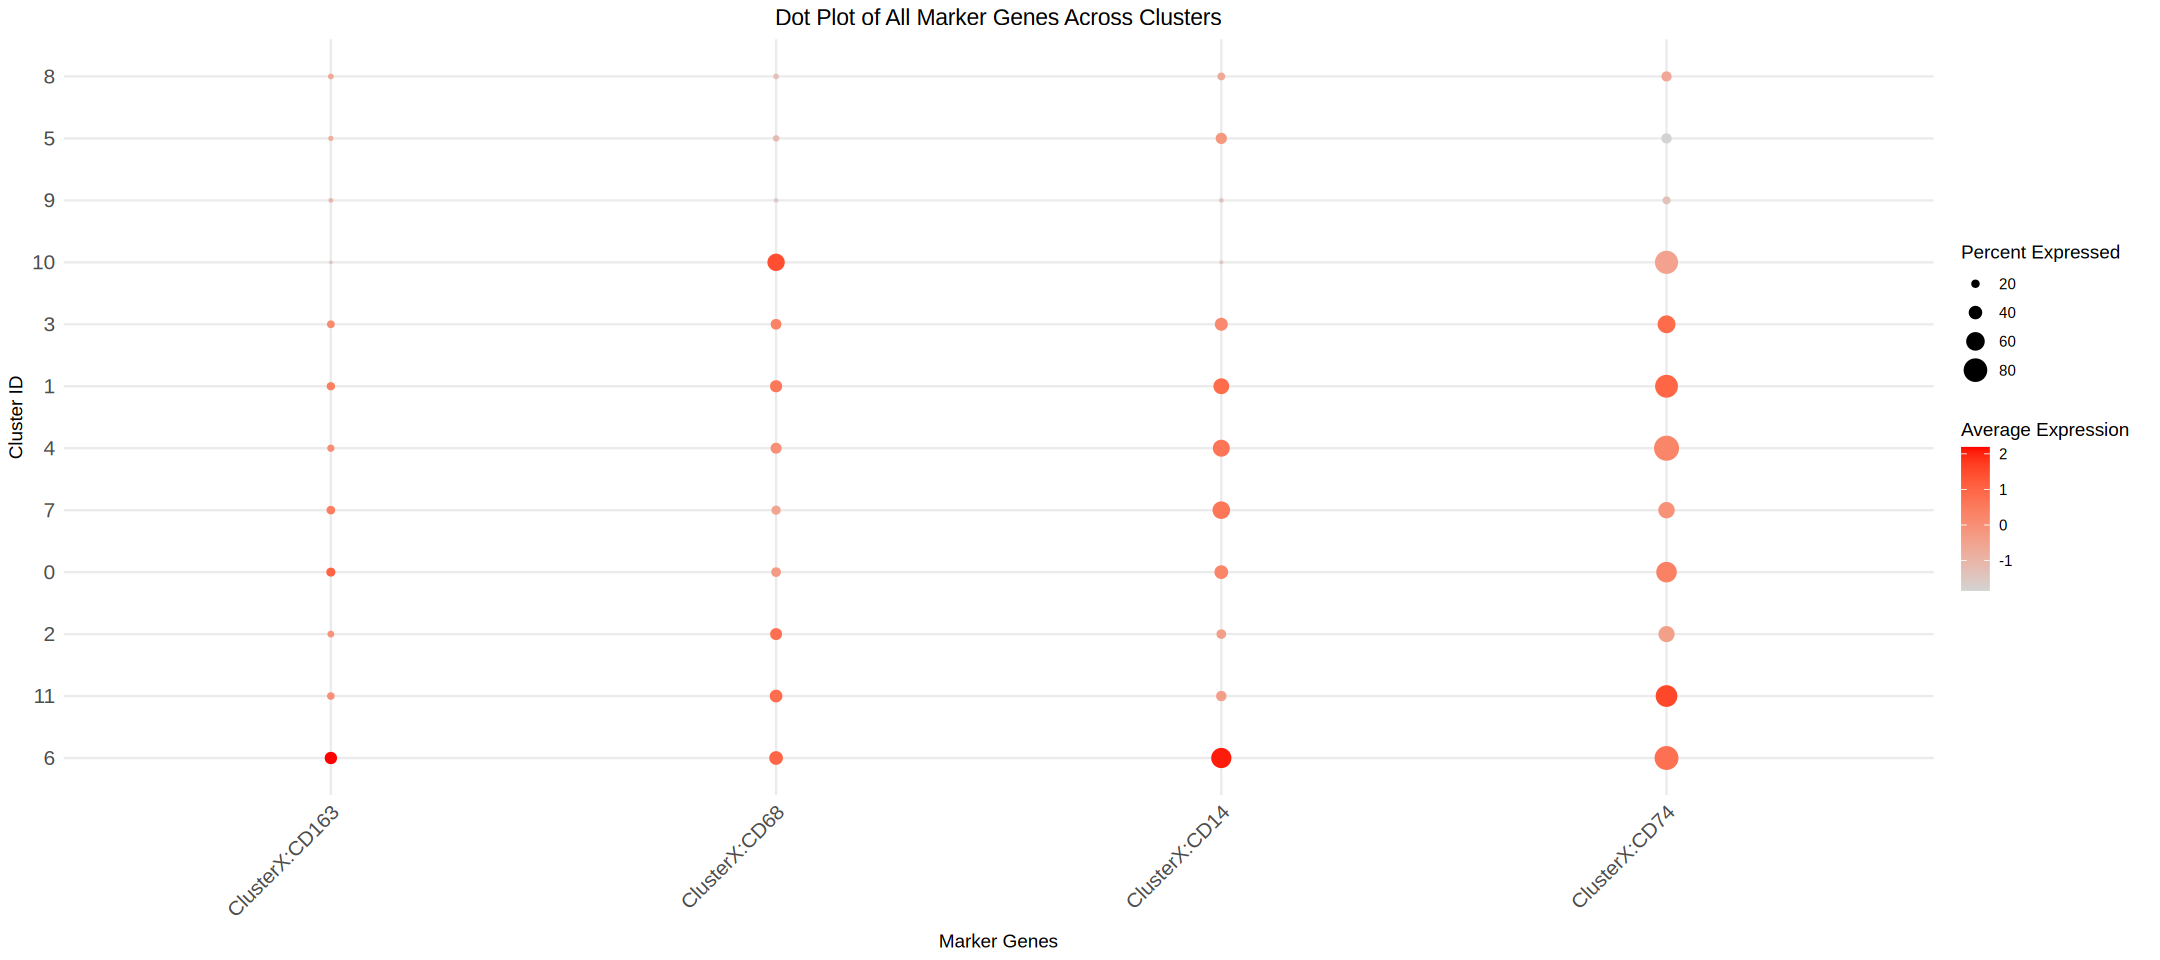

In [66]:
options(repr.plot.width = 18, repr.plot.height = 8)

library(Seurat)
library(ggplot2)

p5 <- DotPlot(myeloid, features = markers_genes, cluster.idents = TRUE) +
  scale_color_gradient(low = "lightgrey", high = "red") +
  theme_minimal() +
  xlab("Marker Genes") +
  ylab("Cluster ID") +
  ggtitle("Dot Plot of All Marker Genes Across Clusters") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    plot.title  = element_text(hjust = 0.5)
  ) +
  # Override labels so "CD3D" is displayed as "T_cells:CD3D", etc.
  scale_x_discrete(labels = label_map)

# Print the plot
p5

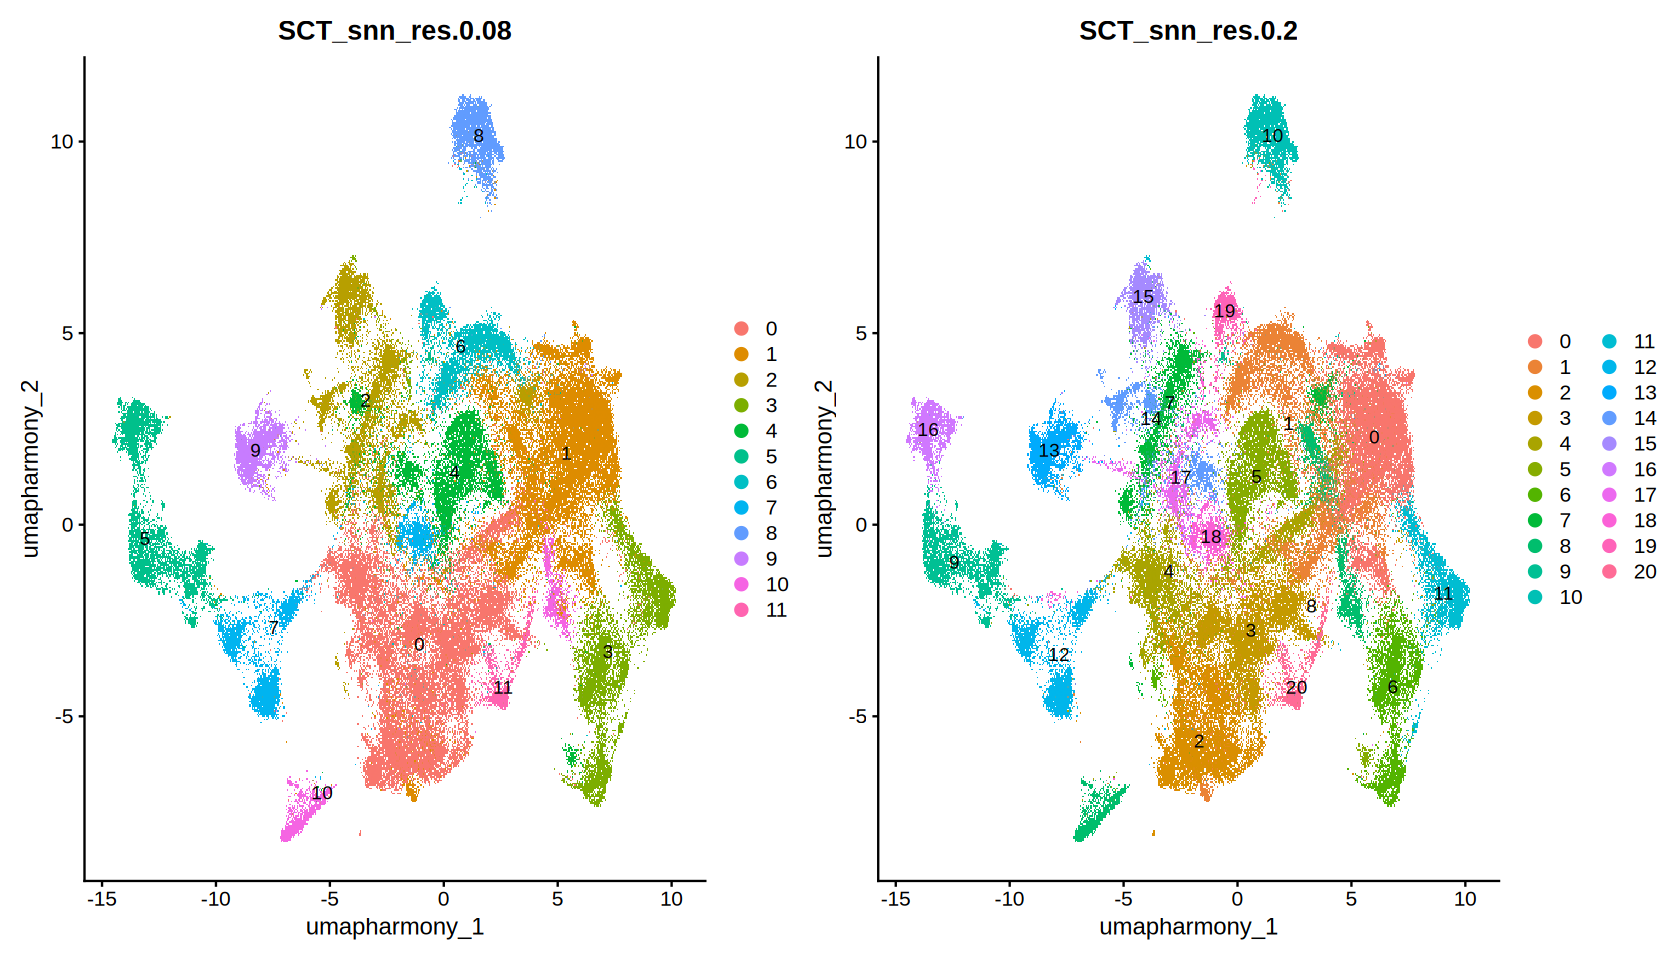

In [67]:
options(repr.plot.width = 14, repr.plot.height = 8)
p1 | p2

In [24]:
cluster0_genes <- all_markers |> filter(cluster == 0 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster1_genes <- all_markers |> filter(cluster == 1 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster2_genes <- all_markers |> filter(cluster == 2 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster3_genes <- all_markers |> filter(cluster == 3 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster4_genes <- all_markers |> filter(cluster == 4 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster5_genes <- all_markers |> filter(cluster == 5 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster6_genes <- all_markers |> filter(cluster == 6 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster7_genes <- all_markers |> filter(cluster == 7 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster8_genes <- all_markers |> filter(cluster == 8 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster9_genes <- all_markers |> filter(cluster == 9 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster10_genes <- all_markers |> filter(cluster == 10 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster11_genes <- all_markers |> filter(cluster == 11 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster12_genes <- all_markers |> filter(cluster == 12 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster13_genes <- all_markers |> filter(cluster == 13 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster14_genes <- all_markers |> filter(cluster == 14 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster15_genes <- all_markers |> filter(cluster == 15 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene) 
cluster16_genes <- all_markers |> filter(cluster == 16 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster17_genes <- all_markers |> filter(cluster == 17 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster18_genes <- all_markers |> filter(cluster == 18 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster19_genes <- all_markers |> filter(cluster == 19 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster20_genes <- all_markers |> filter(cluster == 20 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)

In [47]:
cluster0_2_genes <- all_markers_2 |> filter(cluster == 0 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster1_2_genes <- all_markers_2 |> filter(cluster == 1 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster2_2_genes <- all_markers_2 |> filter(cluster == 2 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster3_2_genes <- all_markers_2 |> filter(cluster == 3 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster4_2_genes <- all_markers_2 |> filter(cluster == 4 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster5_2_genes <- all_markers_2 |> filter(cluster == 5 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster6_2_genes <- all_markers_2 |> filter(cluster == 6 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster7_2_genes <- all_markers_2 |> filter(cluster == 7 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster8_2_genes <- all_markers_2 |> filter(cluster == 8 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster9_2_genes <- all_markers_2 |> filter(cluster == 9 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster10_2_genes <- all_markers_2 |> filter(cluster == 10 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster11_2_genes <- all_markers_2 |> filter(cluster == 11 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)

In [52]:
# Convert gene symbols to Entrez IDs
entrez_ids <- bitr(
    cluster5_2_genes,
    fromType = "SYMBOL", 
    toType = "ENTREZID", 
    OrgDb = org.Hs.eg.db)

'select()' returned 1:1 mapping between keys and columns



In [62]:
entrez_ids |> head()

SYMBOL ENTREZID
1 MIF    4282    
2 PLIN2  123     
3 LDHA   3939    
4 CSTB   1476    
5 LGALS3 3958    
6 GPNMB  10457

In [53]:
# GO enrichment analysis
go_result <- enrichGO(gene = entrez_ids$ENTREZID,
                                         OrgDb = org.Hs.eg.db,
                                         ont = "BP",  # Biological Process
                                         pAdjustMethod = "BH",
                                         pvalueCutoff = 0.05,
                                         qvalueCutoff = 0.05
                                         )

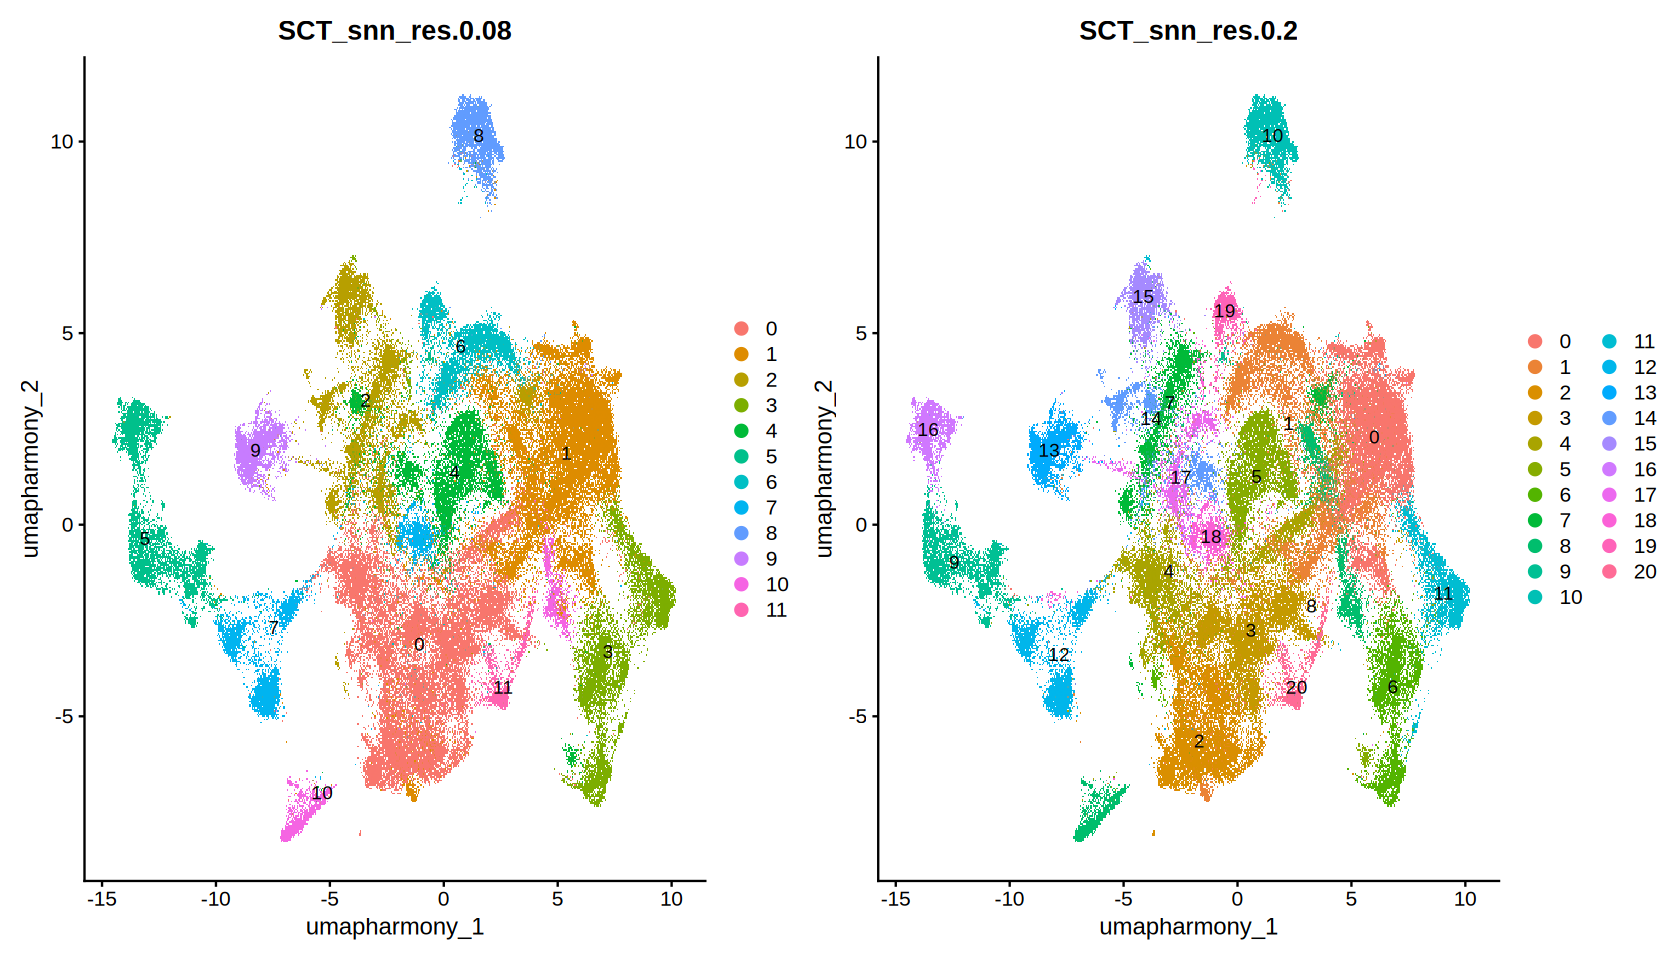

In [32]:
options(repr.plot.width = 14, repr.plot.height = 8)
p1 | p2

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


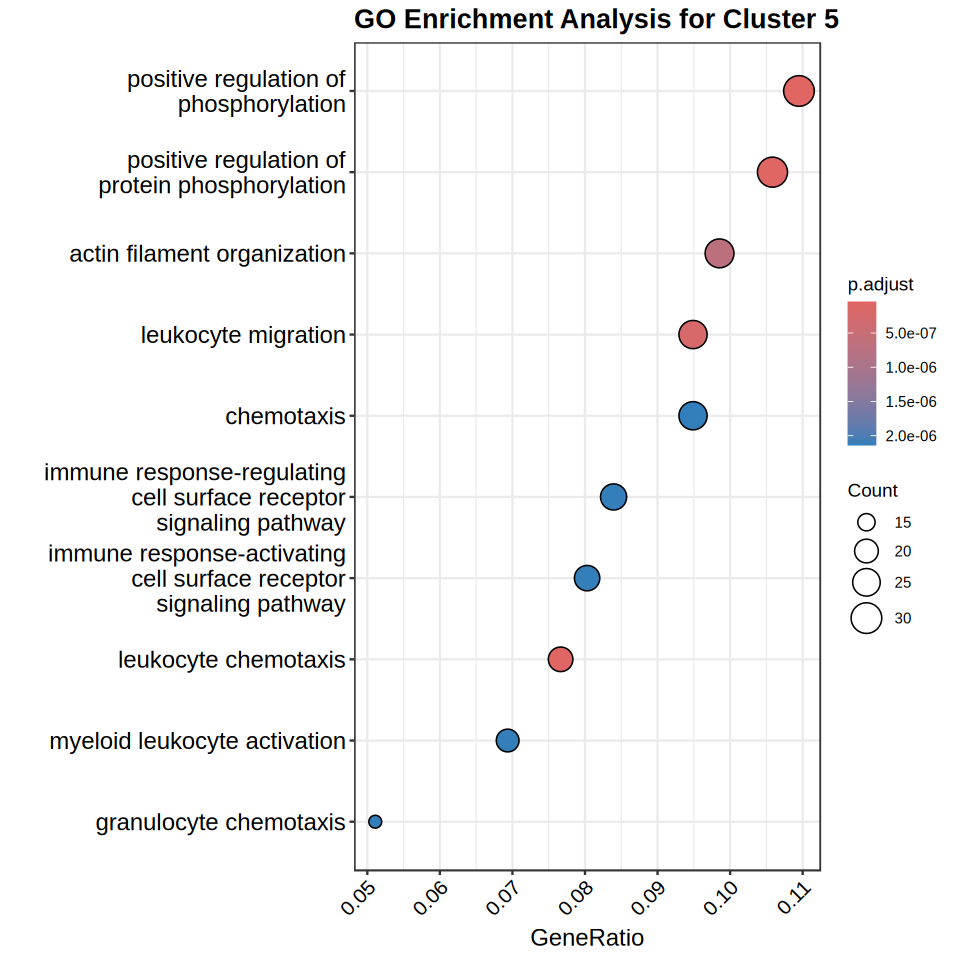

In [54]:
# Visualize GO results
options(repr.plot.width = 8, repr.plot.height = 8)
dotplot(go_result, showCategory = 10) + 
    ggtitle("GO Enrichment Analysis for Cluster 5") +
    theme(plot.title = element_text(size = 16, face = "bold"),
          axis.text.y = element_text(size = 14),
          axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
          axis.title = element_text(size = 14)) +
    scale_size(range = c(3, 8))

# Annote Cell Types

In [51]:
cluster5_2 |> head(20)

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene  
FCGR3B  0     7.449122   0.329 0.003 0         5       FCGR3B
ADGRG3  0     7.005701   0.342 0.004 0         5       ADGRG3
IL1R2   0     5.597288   0.445 0.018 0         5       IL1R2 
TMEM71  0     4.539815   0.314 0.023 0         5       TMEM71
RUBCNL  0     4.423401   0.351 0.043 0         5       RUBCNL
TMCC3   0     4.196868   0.408 0.056 0         5       TMCC3 
MCTP2   0     4.093584   0.328 0.027 0         5       MCTP2 
AQP91   0     3.933552   0.560 0.065 0         5       AQP9  
NAMPT   0     3.810823   0.891 0.361 0         5       NAMPT 
PTGS2   0     3.794249   0.393 0.058 0         5       PTGS2 
VNN2    0     3.746714   0.293 0.027 0         5       VNN2  
GLT1D1  0     3.733450   0.366 0.040 0         5       GLT1D1
IFITM21 0     3.708430   0.615 0.222 0         5       IFITM2
XPO6    0     3.678893   0.437 0.062 0         5       XPO6  
CD55    0     3.645647   0.628 0.121 0         5       CD55  
LITAF   0     3.559951   0.644 0.175 0         5       LITAF 
NDEL1   0     3.545968   0.345 0.054 0         5       NDEL1 
MXD1    0     3.536266   0.586 0.092 0         5       MXD1  
LIMK2   0     3.533040   0.497 0.075 0         5       LIMK2 
CPD     0     3.457652   0.330 0.054 0         5       CPD

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


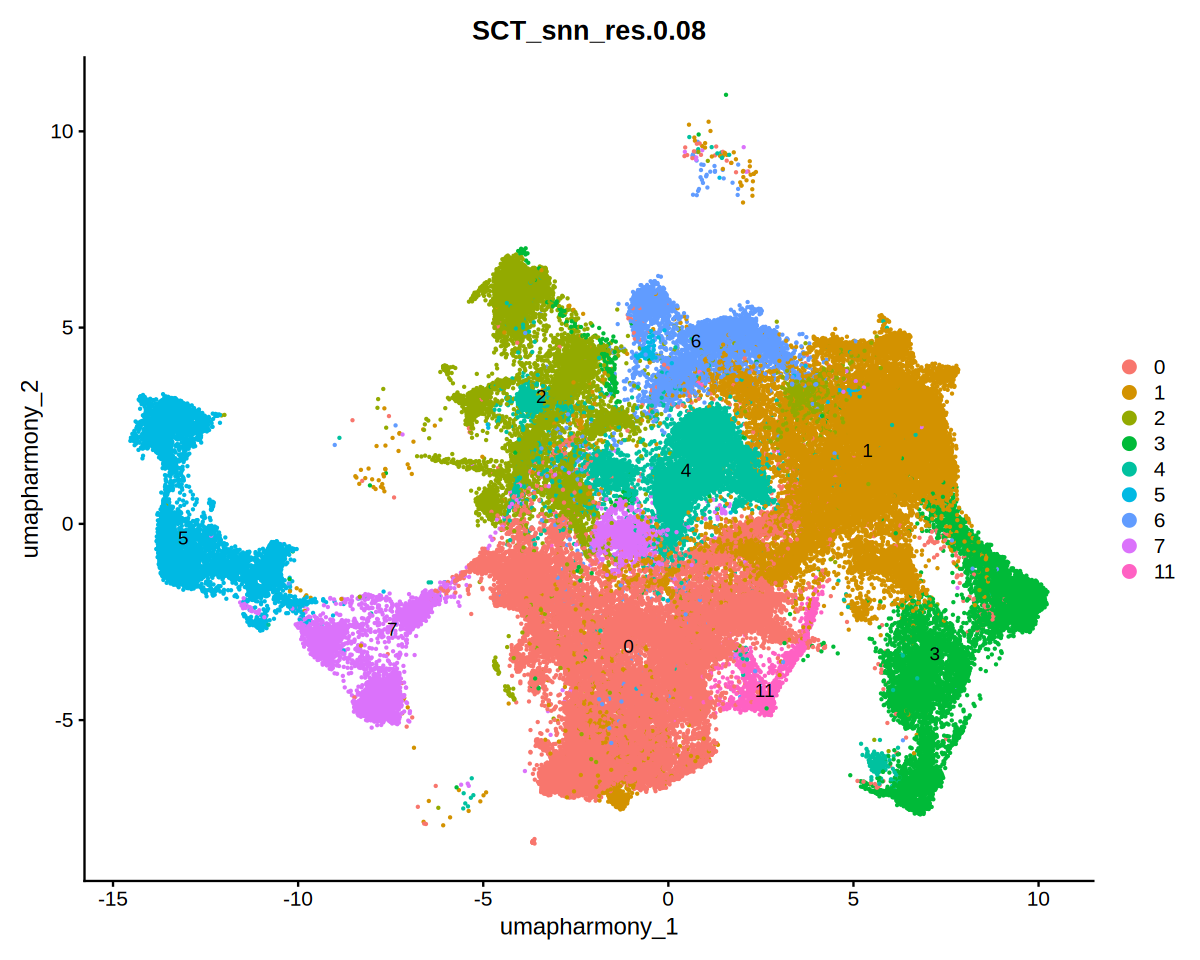

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)
DimPlot(myeloid_clean, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.08', label = TRUE, raster = FALSE)

In [7]:
Idents(myeloid_clean) <- "SCT_snn_res.0.08"

In [8]:
myeloid_clean@meta.data <- myeloid_clean@meta.data %>%
    mutate(general_cell_type = case_when(
        SCT_snn_res.0.08 %in% c(0) ~ "MERT_Homeostatic_TAM",
        SCT_snn_res.0.08 %in% c(1) ~ "C1Q_MHCII_TAM",
        SCT_snn_res.0.08 %in% c(2) ~ "Hypoxic_TAM",
        SCT_snn_res.0.08 %in% c(3) ~ "IFN_TAM",
        SCT_snn_res.0.08 %in% c(4) ~ "Inflammatory_TAM",
        SCT_snn_res.0.08 %in% c(5) ~ "Neutrophil",
        SCT_snn_res.0.08 %in% c(6) ~ "SPP1_TAM",
        SCT_snn_res.0.08 %in% c(7) ~ "Monocyte",        
        SCT_snn_res.0.08 %in% c(11) ~ "HSP_stress_TAM",
        TRUE ~ NA_character_
    ))

head(myeloid_clean@meta.data)

orig.ident  
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 PRJNA1125010
                                                                                        nCount_RNA
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1  1175     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1  4284     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 44655     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 29414     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1  3246     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 10869     
                                                                                        nFeature_RNA
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1  713        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 2090        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 6053        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 6000        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 1661        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 3658        
                                                                                        project_id  
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 PRJNA1125010
                                                                                        orig_sample_id                          
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 PRJNA1125010__filtered_feature_bc_matrix
                                                                                        sample_uid                                                          
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__S

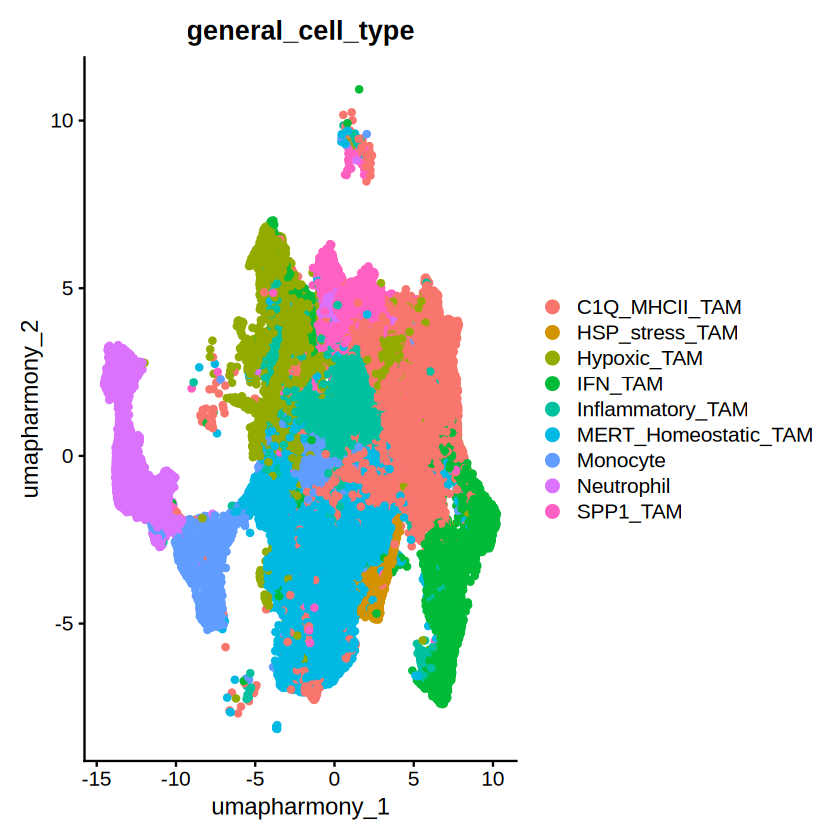

In [9]:
DimPlot(myeloid_clean, reduction = 'umap.harmony', group.by = 'general_cell_type', pt.size = 1.2)

In [ ]:
saveRDS(myeloid_clean, '')

In [12]:
Idents(myeloid_clean) <- 'general_cell_type'

In [13]:
myeloid_markers <- FindAllMarkers(                                                                                                                                      
  object = myeloid_clean,                                                                                                                                             
  assay = "SCT",                                                                                                                                                      
  only.pos = TRUE,                                                                                                                                                    
  min.pct = 0.25,                                                                                                                                                     
  logfc.threshold = 0.25,                                                                                                                                             
  test.use = "wilcox"                                                                                                                                                 
)

Calculating cluster C1Q_MHCII_TAM



Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Calculating cluster MERT_Homeostatic_TAM

Calculating cluster Hypoxic_TAM

Calculating cluster SPP1_TAM

Calculating cluster Monocyte

Calculating cluster Inflammatory_TAM

Calculating cluster IFN_TAM

Calculating cluster Neutrophil

Calculating cluster HSP_stress_TAM



In [10]:
myeloid_clean$general_cell_type |> unique()

[1] "C1Q_MHCII_TAM"        "MERT_Homeostatic_TAM" "Hypoxic_TAM"         
[4] "SPP1_TAM"             "Monocyte"             "Inflammatory_TAM"    
[7] "IFN_TAM"              "Neutrophil"           "HSP_stress_TAM"

In [14]:
C1Q_TAM <- myeloid_markers %>% filter(cluster == 'C1Q_MHCII_TAM') %>% arrange(desc(avg_log2FC))
MERT_TAM <- myeloid_markers %>% filter(cluster == 'MERT_Homeostatic_TAM') %>% arrange(desc(avg_log2FC))
Hypoxic_TAM <- myeloid_markers %>% filter(cluster == 'Hypoxic_TAM') %>% arrange(desc(avg_log2FC))
SPP1_TAM <- myeloid_markers %>% filter(cluster == 'SPP1_TAM') %>% arrange(desc(avg_log2FC))
Monocyte <- myeloid_markers %>% filter(cluster == 'Monocyte') %>% arrange(desc(avg_log2FC))
Inflammatory_TAM <- myeloid_markers %>% filter(cluster == 'Inflammatory_TAM') %>% arrange(desc(avg_log2FC))
IFN_TAM <- myeloid_markers %>% filter(cluster == 'IFN_TAM') %>% arrange(desc(avg_log2FC))
Neutrophil <- myeloid_markers %>% filter(cluster == 'Neutrophil') %>% arrange(desc(avg_log2FC))
HSP_stress_TAM <- myeloid_markers %>% filter(cluster == 'HSP_stress_TAM') %>% arrange(desc(avg_log2FC))

In [15]:
C1Q_TAM |> head(20)
# MERT_TAM |> head(20)
# Hypoxic_TAM |> head(20)
# SPP1_TAM |> head(20)
# Monocyte |> head(20)

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster       gene    
MBP      0     1.9709977  0.362 0.230 0         C1Q_MHCII_TAM MBP     
HMOX1    0     1.4833742  0.401 0.212 0         C1Q_MHCII_TAM HMOX1   
FTL      0     1.3929801  0.955 0.911 0         C1Q_MHCII_TAM FTL     
HLA-DPA1 0     1.2634723  0.680 0.417 0         C1Q_MHCII_TAM HLA-DPA1
HLA-DPB1 0     1.2490637  0.663 0.397 0         C1Q_MHCII_TAM HLA-DPB1
HLA-DMA  0     1.1143480  0.455 0.247 0         C1Q_MHCII_TAM HLA-DMA 
C1QA     0     1.0946442  0.623 0.336 0         C1Q_MHCII_TAM C1QA    
RPS2     0     1.0820722  0.924 0.675 0         C1Q_MHCII_TAM RPS2    
C1QB     0     1.0816307  0.640 0.347 0         C1Q_MHCII_TAM C1QB    
HLA-DRA  0     1.0797317  0.762 0.571 0         C1Q_MHCII_TAM HLA-DRA 
HLA-DQB1 0     1.0746084  0.408 0.239 0         C1Q_MHCII_TAM HLA-DQB1
NDUFA4   0     1.0389036  0.513 0.297 0         C1Q_MHCII_TAM NDUFA4  
PRDX1    0     1.0352649  0.467 0.272 0         C1Q_MHCII_TAM PRDX1   
HLA-DQA1 0     1.0308157  0.362 0.202 0         C1Q_MHCII_TAM HLA-DQA1
APOC1    0     1.0282903  0.570 0.292 0         C1Q_MHCII_TAM APOC1   
EEF1B2   0     1.0088337  0.625 0.392 0         C1Q_MHCII_TAM EEF1B2  
NPC2     0     1.0057079  0.655 0.432 0         C1Q_MHCII_TAM NPC2    
RGS10    0     0.9970832  0.378 0.219 0         C1Q_MHCII_TAM RGS10   
APOE     0     0.9936961  0.683 0.417 0         C1Q_MHCII_TAM APOE    
RPL5     0     0.9743633  0.770 0.524 0         C1Q_MHCII_TAM RPL5

Warning message:
“package ‘png’ was built under R version 4.4.3”


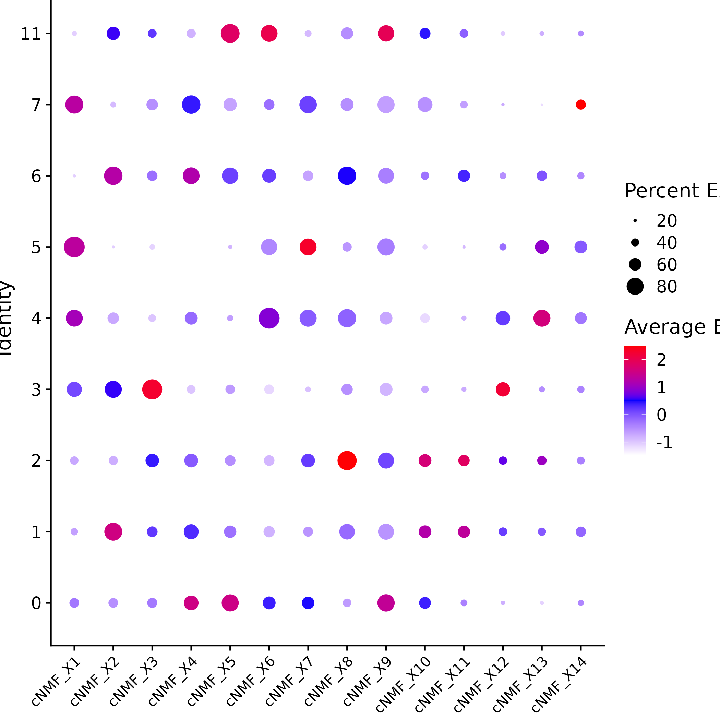

In [15]:
library(png)
img <- readPNG('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/cNMF_myeloid_clean/plot.png')
options(repr.plot.width=6, repr.plot.height=6)
# Convert to ggplot object
ggplot() +
    annotation_raster(img, xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf) +
    theme_void()

In [ ]:
# Program 1: FCN1/VCAN inflammatory monocyte / S100A8/A9⁺ MDSC-like program
# -> Positive with 4, 5, and 7 
# Program 2: C1Q–TREM2–APOE complement & MHC-II antigen-presenting microglia/TAM program
# -> Positive with 1 and 6
# Prorgam 3: Type I interferon / ISG response program (with neuronal contamination)
# -> Postive with 3
# Program 4: Leukocyte migration / chemotaxis and lipid–ion transport program
# -> Positive with 0 and 6 
# Program 5: Efferocytosis / engulfment & glycosylation program in TAMs
# -> Positive with 0 and 11 
# Program 6: Immediate-early NF-κB / AP-1 activation program (early inflammatory response)
# -> Positive with 4 and 11 
# Program 7: Macrophage differentiation / polarization program (TGF-β–AHR–NR4A/NRIP1 axis)
# -> Positive with 5 
# Program 8: Hypoxia / glycolysis / metabolic-stress immunosuppressive TAM program
# -> Positive with 2
# Program 9: Heat-shock / proteotoxic stress and glutamine metabolism program
# -> Positive with 0 and 11 
# Program 10: Neuronal / synaptic adhesion and signaling program (non-myeloid)
# -> Positive with 1 and 2
# Prorgam 11: Cancer-testis antigen (CTA) + melanocytic tumor program (non-myeloid)
# -> Ignore
# Prorgam 12: Epithelial / hepatocyte-like secretory tumor program (non-myeloid)
# -> Positive with 3 (can ignore)
# Prorgam 13: Collagen-rich ECM / CAF (matrix fibroblast) program with CHI3L1–chemerin signaling
# -> Positive with 4 (can ignore)
# Program 14: Mast cell activation / degranulation program
# -> Positive with 7 

# Loading cNMF

In [10]:
myeloid_clean$general_cell_type |> unique()

[1] "C1Q_MHCII_TAM"        "MERT_Homeostatic_TAM" "Hypoxic_TAM"         
[4] "SPP1_TAM"             "Monocyte"             "Inflammatory_TAM"    
[7] "IFN_TAM"              "Neutrophil"           "HSP_stress_TAM"

In [ ]:
# Load obj 
obj <- readRDS("/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/subclusters/myeloid/cNMF/myeloid_clean_cNMF.rds")
obj

An object of class Seurat 
69863 features across 94270 samples within 2 assays 
Active assay: SCT (31257 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap.harmony

In [17]:
obj@meta.data |> head()
obj$general_cell_type |> unique()

orig.ident  
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 PRJNA1125010
                                                                                        nCount_RNA
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1  1175     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1  4284     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 44655     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 29414     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1  3246     
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 10869     
                                                                                        nFeature_RNA
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1  713        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 2090        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 6053        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 6000        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 1661        
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 3658        
                                                                                        project_id  
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 PRJNA1125010
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 PRJNA1125010
                                                                                        orig_sample_id                          
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1 PRJNA1125010__filtered_feature_bc_matrix
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1 PRJNA1125010__filtered_feature_bc_matrix
                                                                                        sample_uid                                                          
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1 PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__S

[1] "Myeloid"

In [18]:
# 2. Define the Dictionary (Map Program Numbers to Cell Types)
# Based on your gene lists analysis:
program_mapping <- list(
  "Inflammatory" = c(1),          
  "Antigen Presentation" = c(2), 
  "Interferon Response" = c(3),         
  "Leukocyte migrate & Chemotaxis" = c(4),        
  "Efferocytosis" = c(5),           # Should be ignored
  "NF-κB Pathway" = c(6),              
  "Macrophage differentiation" = c(7),            
  'Hypoxia_Glycolysis Immuno Suppresive' = c(8),
  'Heat-shock_proteotoxic stress' = c(9),
  'Neuronal_synaptic adhesion' = c(10), # Should be ignored
  'CTA' = c(11), # Should be ignored
  'Epithelial' = c(12), # Should be ignored
  'Collagen-rich ECM' = c(13), # Should be ignored
  'Mast cell activation' = c(14) # Should be ignored
)

# 3. Assign Identity
# We find the max program for each cell and map it to a name.
cnmf_usage_cols <- paste0("cNMF_X", 1:14)
usage_matrix <- obj@meta.data[, cnmf_usage_cols]

# Find column index of max value
max_col_idx <- max.col(usage_matrix, ties.method = "first")
obj$Max_Program_Num <- max_col_idx

# Function to lookup name
get_identity <- function(prog_num) {
  for (type in names(program_mapping)) {
    if (prog_num %in% program_mapping[[type]]) return(type)
  }
  return("Unknown")
}

obj$cNMF_Broad_Identity <- sapply(obj$Max_Program_Num, get_identity)

# 4. Verify the split
table(obj$cNMF_Broad_Identity)


                Antigen Presentation                    Collagen-rich ECM 
                               21062                                   66 
                                 CTA                        Efferocytosis 
                                 351                                 6540 
                          Epithelial        Heat-shock_proteotoxic stress 
                                 306                                 2043 
Hypoxia_Glycolysis Immuno Suppresive                         Inflammatory 
                                5502                                23447 
                 Interferon Response       Leukocyte migrate & Chemotaxis 
                               12361                                11546 
          Macrophage differentiation                 Mast cell activation 
                                4726                                  122 
          Neuronal_synaptic adhesion                        NF-κB Pathway 
                        

In [19]:
# ==============================================================================
# 3.5. FILTERING STEP
# ==============================================================================
# Now that 'cNMF_Broad_Identity' exists, we can use it to filter.

# A. List the exact names you gave to Program 11 and 12 in your dictionary
# (Example: If you named Prog 11 "CTA" and Prog 12 "Epithelial")
garbage_identities <- c('Neuronal / synaptic adhesion', "CTA", 'Epithelial', 'Collagen-rich ECM', 'Efferocytosis', 'Mast cell activation', 'Heat-shock_proteotoxic stress') 

# B. Identify the cells
cells_to_remove <- rownames(obj@meta.data[obj$cNMF_Broad_Identity %in% garbage_identities, ])

# C. Remove them
# We overwrite 'obj' with the clean version (or create 'obj_clean' if you prefer safety)
obj <- subset(obj, cells = cells_to_remove, invert = TRUE)

message("Removed ", length(cells_to_remove), " cells belonging to: ", paste(garbage_identities, collapse=", "))

# ==============================================================================
# 4. Verify the split (EXISTING CODE)
# ==============================================================================
# Now when you run this, the garbage classes should be gone
table(obj$cNMF_Broad_Identity)

Removed 9428 cells belonging to: Neuronal / synaptic adhesion, CTA, Epithelial, Collagen-rich ECM, Efferocytosis, Mast cell activation, Heat-shock_proteotoxic stress




                Antigen Presentation Hypoxia_Glycolysis Immuno Suppresive 
                               21062                                 5502 
                        Inflammatory                  Interferon Response 
                               23447                                12361 
      Leukocyte migrate & Chemotaxis           Macrophage differentiation 
                               11546                                 4726 
          Neuronal_synaptic adhesion                        NF-κB Pathway 
                                2039                                 4159 

In [20]:
# # Select Markers
# # 1. Load Spectra (The definition of programs)
# cnmf_dir <- "/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/cNMF"
# run_name <- "Glioma_Adult_Myeloid"
# CHOSEN_K <- 14  # <--- Ensure this matches your Usage Matrix!

# # Load the spectra for K=14 (Not 18)
# spectra_file <- file.path(cnmf_dir, run_name, 
#                           paste0(run_name, ".gene_spectra_score.k_", CHOSEN_K, ".dt_0_02.txt"))

# # Read and convert
# spectra <- read.table(spectra_file, header = TRUE, row.names = 1, sep = "\t")
# spectra <- as.matrix(spectra)

# # 2. Extract Top 5 Marker Genes per Program
# # (We use 5 instead of 20 to keep the dry-run heatmap readable. 
# # If it looks good, you can increase to 20 later).
# top_genes_list <- list()

# for (i in 1:14) {
#   # Sort decreasing and take top 5 names
#   genes <- names(sort(spectra[i,], decreasing = TRUE))[1:5]
#   top_genes_list[[paste0("Prog_", i)]] <- genes
# }

# # Flatten into one vector of unique genes
# heatmap_genes <- unique(unlist(top_genes_list))
# ==============================================================================
# Step A: Load the Spectra Matrix
# ==============================================================================

# Config (Ensure these match your K=14 run)
cnmf_dir <- "/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/cNMF_myeloid_clean"
run_name <- "Glioma_Adult_Myeloid"
k_val <- 14 

# Construct path to the Spectra Score file
spectra_file <- file.path(cnmf_dir, run_name, 
                          paste0(run_name, ".gene_spectra_score.k_", k_val, ".dt_0_02.txt"))

# Read and convert to matrix
spectra <- read.table(spectra_file, header = TRUE, row.names = 1, sep = "\t")
spectra <- as.matrix(spectra)

In [21]:
# ==============================================================================
# Step B: View Top Genes
# ==============================================================================

# Function to get top N genes
get_top_genes <- function(prog_num, n=50) {
  names(sort(spectra[prog_num,], decreasing = TRUE))[1:n]
}

# OPTION 1: Print to Console
# This lets you quickly scroll through and spot familiar names
for (i in 1:k_val) {
  cat(paste0("\n=== Program ", i, " ===\n"))
  print(get_top_genes(i, n = 30)) # Prints top 30 genes
}

# OPTION 2: Save to a text file (Recommended)
# This creates a file you can open in Excel/Notepad to copy-paste from
output_file <- "/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/cNMF_myeloid_clean/cNMF_Top_Genes_List.txt"
sink(output_file)
for (i in 1:k_val) {
  cat(paste0("Program ", i, "\t", paste(get_top_genes(i, n=100), collapse=", "), "\n"))
}
sink()

message("Gene list saved to: ", output_file)


=== Program 1 ===
 [1] "VCAN"      "FCN1"      "CD36"      "S100A9"    "LYZ"       "CTSS"     
 [7] "DPYD"      "AOAH"      "MAP3K1"    "S100A12"   "CLEC12A"   "AHNAK"    
[13] "S100A4"    "PLCB1"     "PLBD1"     "S100A8"    "MPEG1"     "CD48"     
[19] "TMTC2"     "MPP7"      "JAML"      "GAS7"      "RAB11FIP1" "SLCO3A1"  
[25] "CD300E"    "STK17B"    "LYST"      "FRY"       "MT.CO1"    "PTPRC"    

=== Program 2 ===
 [1] "CD74"     "NAPSB"    "C1QC"     "TREM2"    "HLA.DRB5" "CD81"    
 [7] "APOO"     "PLD4"     "ACTB"     "HLA.DRB1" "HLA.DPA1" "APOE"    
[13] "C1QB"     "RNASET2"  "ALOX5AP"  "MT.ATP8"  "CAPG"     "YWHAH"   
[19] "C1QA"     "PFN1"     "HLA.DRA"  "HLA.DMA"  "CST3"     "PPIA"    
[25] "NPC2"     "EEF1A1"   "TUBA1B"   "LILRB4"   "HLA.DPB1" "GRN"     

=== Program 3 ===
 [1] "CHRM3"  "NRCAM"  "ISG15"  "TENM2"  "IGFBP7" "RBP4"   "MX1"    "GRIK2" 
 [9] "CDKN2A" "IFI27"  "CALD1"  "GLIS3"  "TNIK"   "GPC6"   "PTN"    "NTRK2" 
[17] "GABRG3" "IFI44L" "SOX5"   "KCNIP4" "PDE4D" 

Gene list saved to: /mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/cNMF_myeloid_clean/cNMF_Top_Genes_List.txt



In [22]:
# 1. Define the programs you kept (exclude the garbage ones like 11, 12)
# Use the logic from your program_mapping
valid_programs <- c(1, 2, 3, 4, 6, 7, 8) # Example list based on your previous cleanup

# 2. Extract Top 5 Candidates for each Valid Program
# We pull these from the Spectra matrix you loaded earlier
candidates_list <- list()

for (i in valid_programs) {
  # Get top 5 genes by weight
  top_5 <- names(sort(spectra[i,], decreasing = TRUE))[1:10]
  
  # Name them so we know which program they belong to
  prog_name <- names(program_mapping)[sapply(program_mapping, function(x) i %in% x)]
  if(length(prog_name) == 0) prog_name <- paste0("Prog_", i)
  
  candidates_list[[prog_name]] <- top_5
}

# Flatten the list for plotting
all_candidates <- unique(unlist(candidates_list))

In [23]:
print(candidates_list)

$Inflammatory
 [1] "VCAN"    "FCN1"    "CD36"    "S100A9"  "LYZ"     "CTSS"    "DPYD"   
 [8] "AOAH"    "MAP3K1"  "S100A12"

$`Antigen Presentation`
 [1] "CD74"     "NAPSB"    "C1QC"     "TREM2"    "HLA.DRB5" "CD81"    
 [7] "APOO"     "PLD4"     "ACTB"     "HLA.DRB1"

$`Interferon Response`
 [1] "CHRM3"  "NRCAM"  "ISG15"  "TENM2"  "IGFBP7" "RBP4"   "MX1"    "GRIK2" 
 [9] "CDKN2A" "IFI27" 

$`Leukocyte migrate & Chemotaxis`
 [1] "ZNF331"   "SLC16A10" "ATP1B3"   "ANKH"     "FMNL2"    "CCDC138" 
 [7] "EPB41L3"  "CYTH1"    "SIPA1L1"  "TNS3"    

$`NF-κB Pathway`
 [1] "DUSP1"  "KLF2"   "RHOB"   "FOS"    "CCL3L3" "ZFP36"  "CCL4L2" "NR4A1" 
 [9] "CCL3"   "CCL4"  

$`Macrophage differentiation`
 [1] "JARID2" "ZEB2"   "PID1"   "SDC2"   "ATP2B1" "ETV6"   "VAV3"   "NRIP1" 
 [9] "FLNB"   "PIK3R5"

$`Hypoxia_Glycolysis Immuno Suppresive`
 [1] "ALDOA" "GAPDH" "CSTB"  "GPNMB" "LDHA"  "ENO2"  "BNIP3" "MT1X"  "MT1E" 
[10] "MT2A" 



In [24]:
# ==============================================================================
# Modified Step 2: Manual Gene Selection
# ==============================================================================

# 1. Define your Custom List
# Group them by the Program/Identity you want to show.
# You can choose different numbers of genes for each group.
custom_genes_list <- list(
    'Inflammatory' = c('VCAN', 'S100A9', 'LYZ', 'CTSS', 'JAML'),
    'Antigen Presentation' = c('CD74', 'C1QC', 'HLA-DRB5', 'HLA-DRB1', 'HLA-DPA1'),
    'Interferon Response' = c('ISG15', 'IFI27', 'IFI44L', 'IFIT1', 'IFIT3'),
    'Leukocyte migrate & Chemotaxis' = c('FMNL2', 'CYTH1', 'TNS3', 'GPR183', 'ABCA1'),
    'NF-κB_AP-1' = c('FOS', 'JUN', 'CCL3', 'CCL4', 'CCL3L3'),
    'Macrophage differentiation' = c('ZEB2', 'JARID2', 'ETV6', 'CD300E', 'NRIP1'),
    'Hypoxia_Glycolysis Immuno Suppresive' = c('GPNMB', 'LGALS1', 'MIF', 'MT1X', 'MT1E')
)

In [25]:
# 2. Flatten to a vector
heatmap_genes <- unique(unlist(custom_genes_list))

In [26]:
# 3. CRITICAL: Intersect with your object to remove missing genes
# (Assuming your object is named 'obj_myeloid' or similar)
valid_heatmap_genes <- intersect(heatmap_genes, rownames(obj))

In [27]:
# Warn if any are missing
missing_genes <- setdiff(heatmap_genes, rownames(obj))
if(length(missing_genes) > 0) {
  message("Warning: These genes are missing and will be skipped: ", paste(missing_genes, collapse=", "))
}

In [28]:
# 4. Create the Row Split Vector
# This ensures the heatmap rows are grouped by your Program Names, not mixed up.
# We iterate through your list and keep only the valid genes.
gene_groups <- character()
for (prog_name in names(custom_genes_list)) {
  genes_in_prog <- custom_genes_list[[prog_name]]
  valid_genes_in_prog <- intersect(genes_in_prog, valid_heatmap_genes)
  
  if (length(valid_genes_in_prog) > 0) {
    gene_groups <- c(gene_groups, rep(prog_name, length(valid_genes_in_prog)))
  }
}
# Make it a factor to preserve your specific order (Inflammatory -> Antigen -> ...)
gene_groups <- factor(gene_groups, levels = names(custom_genes_list))

In [29]:
# 1. Scale Data for these specific genes
# We do this to ensure the colors are comparable (Z-scores)
obj <- ScaleData(obj, features = valid_heatmap_genes, assay = "SCT")

Warning message:
“The `slot` argument of `SetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


Centering and scaling data matrix



In [30]:
# 2. Extract the Matrix
# Ensure we are pulling from the scaled slot
mat <- GetAssayData(obj, assay = "SCT", layer = "scale.data")[valid_heatmap_genes, ]

In [31]:
# 3. Clip Outliers (Standard practice for heatmaps)
# This prevents one extremely high cell from washing out the color scale
mat[mat > 2.5] <- 2.5
mat[mat < -2.5] <- -2.5

In [32]:
# 4. Define Colors for the Annotation Bar (Optional but nice)
# Create a color mapping for your cNMF Identity labels
unique_identities <- unique(obj$cNMF_Broad_Identity)
# Assign random colors or define your own
identity_colors <- structure(scales::hue_pal()(length(unique_identities)), names = unique_identities)

In [34]:
# Do Heatmap
library(ComplexHeatmap)
library(circlize)

In [ ]:
# top_anno <- HeatmapAnnotation(
#   cNMF_Identity = obj$cNMF_Broad_Identity,
#   col = list(cNMF_Identity = identity_colors),
#   show_annotation_name = FALSE
# )

In [35]:
# 2. Transfer the labels to the cNMF object
# We use AddMetaData to ensure barcodes match perfectly
# (Assuming 'general_cell_type' is the column name in your manual object)
manual_labels <- myeloid_clean$general_cell_type
names(manual_labels) <- colnames(myeloid_clean)

obj <- AddMetaData(obj, metadata = manual_labels, col.name = "Manual_Identity")

# 3. Check for NAs (in case some cells were filtered differently)
# If NAs exist, label them "Unknown"
obj$Manual_Identity[is.na(obj$Manual_Identity)] <- "Unknown"

In [36]:
library(ComplexHeatmap)
library(circlize)
library(scales)

# 1. Define Colors for Manual Annotations
manual_types <- unique(obj$Manual_Identity)
manual_colors <- structure(hue_pal()(length(manual_types)), names = manual_types)

# 2. Define Colors for cNMF Broad Identity (Optional, for comparison)
cnmf_types <- unique(obj$cNMF_Broad_Identity)
cnmf_colors <- structure(grey.colors(length(cnmf_types)), names = cnmf_types)

# 3. Create the Top Annotation
# This puts the colored bars above the heatmap
# top_anno <- HeatmapAnnotation(
#   Manual_Type = obj$Manual_Identity,
#   cNMF_Identity = obj$cNMF_Broad_Identity,
#   col = list(
#     Manual_Type = manual_colors,
#     cNMF_Identity = cnmf_colors
#   ),
#   annotation_legend_param = list(
#     Manual_Type = list(title = "Manual Cell Type"),
#     cNMF_Identity = list(title = "cNMF Program")
#   )
# )
top_anno <- HeatmapAnnotation(
  Manual_Type = obj$Manual_Identity,
  cNMF_Identity = obj$cNMF_Broad_Identity,
  col = list(
    Manual_Type = manual_colors,
    cNMF_Identity = cnmf_colors
  ),
  annotation_legend_param = list(
    Manual_Type = list(
        title = "Manual Cell Type", 
        title_gp = gpar(fontsize = 16, fontface = "bold"), # INCREASE LEGEND TITLE
        labels_gp = gpar(fontsize = 14),                   # INCREASE LEGEND LABELS
        grid_width = unit(8, "mm"),                        # INCREASE COLOR BOX SIZE
        grid_height = unit(8, "mm")
    ),
    cNMF_Identity = list(
        title = "cNMF Program",
        title_gp = gpar(fontsize = 16, fontface = "bold"), # INCREASE LEGEND TITLE
        labels_gp = gpar(fontsize = 14),                   # INCREASE LEGEND LABELS
        grid_width = unit(8, "mm"),
        grid_height = unit(8, "mm")
    )
  )
)

Warning message:
“package ‘scales’ was built under R version 4.4.3”

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [37]:
# 1. Calculate a "Sorting Score"
# We find the usage of the program that matches the cell's assigned cNMF identity
# (This makes the "red" blocks look sharpest)
usage_matrix <- obj@meta.data[, paste0("cNMF_X", 1:14)]
obj$Max_Usage_Score <- apply(usage_matrix, 1, max)

# 2. Define the Order
# Order by Manual Type first, then by Program Strength (descending)
cell_order <- order(obj$Manual_Identity, -obj$Max_Usage_Score)

# 3. Re-order the matrix for the heatmap
mat_ordered <- mat[, cell_order]

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.



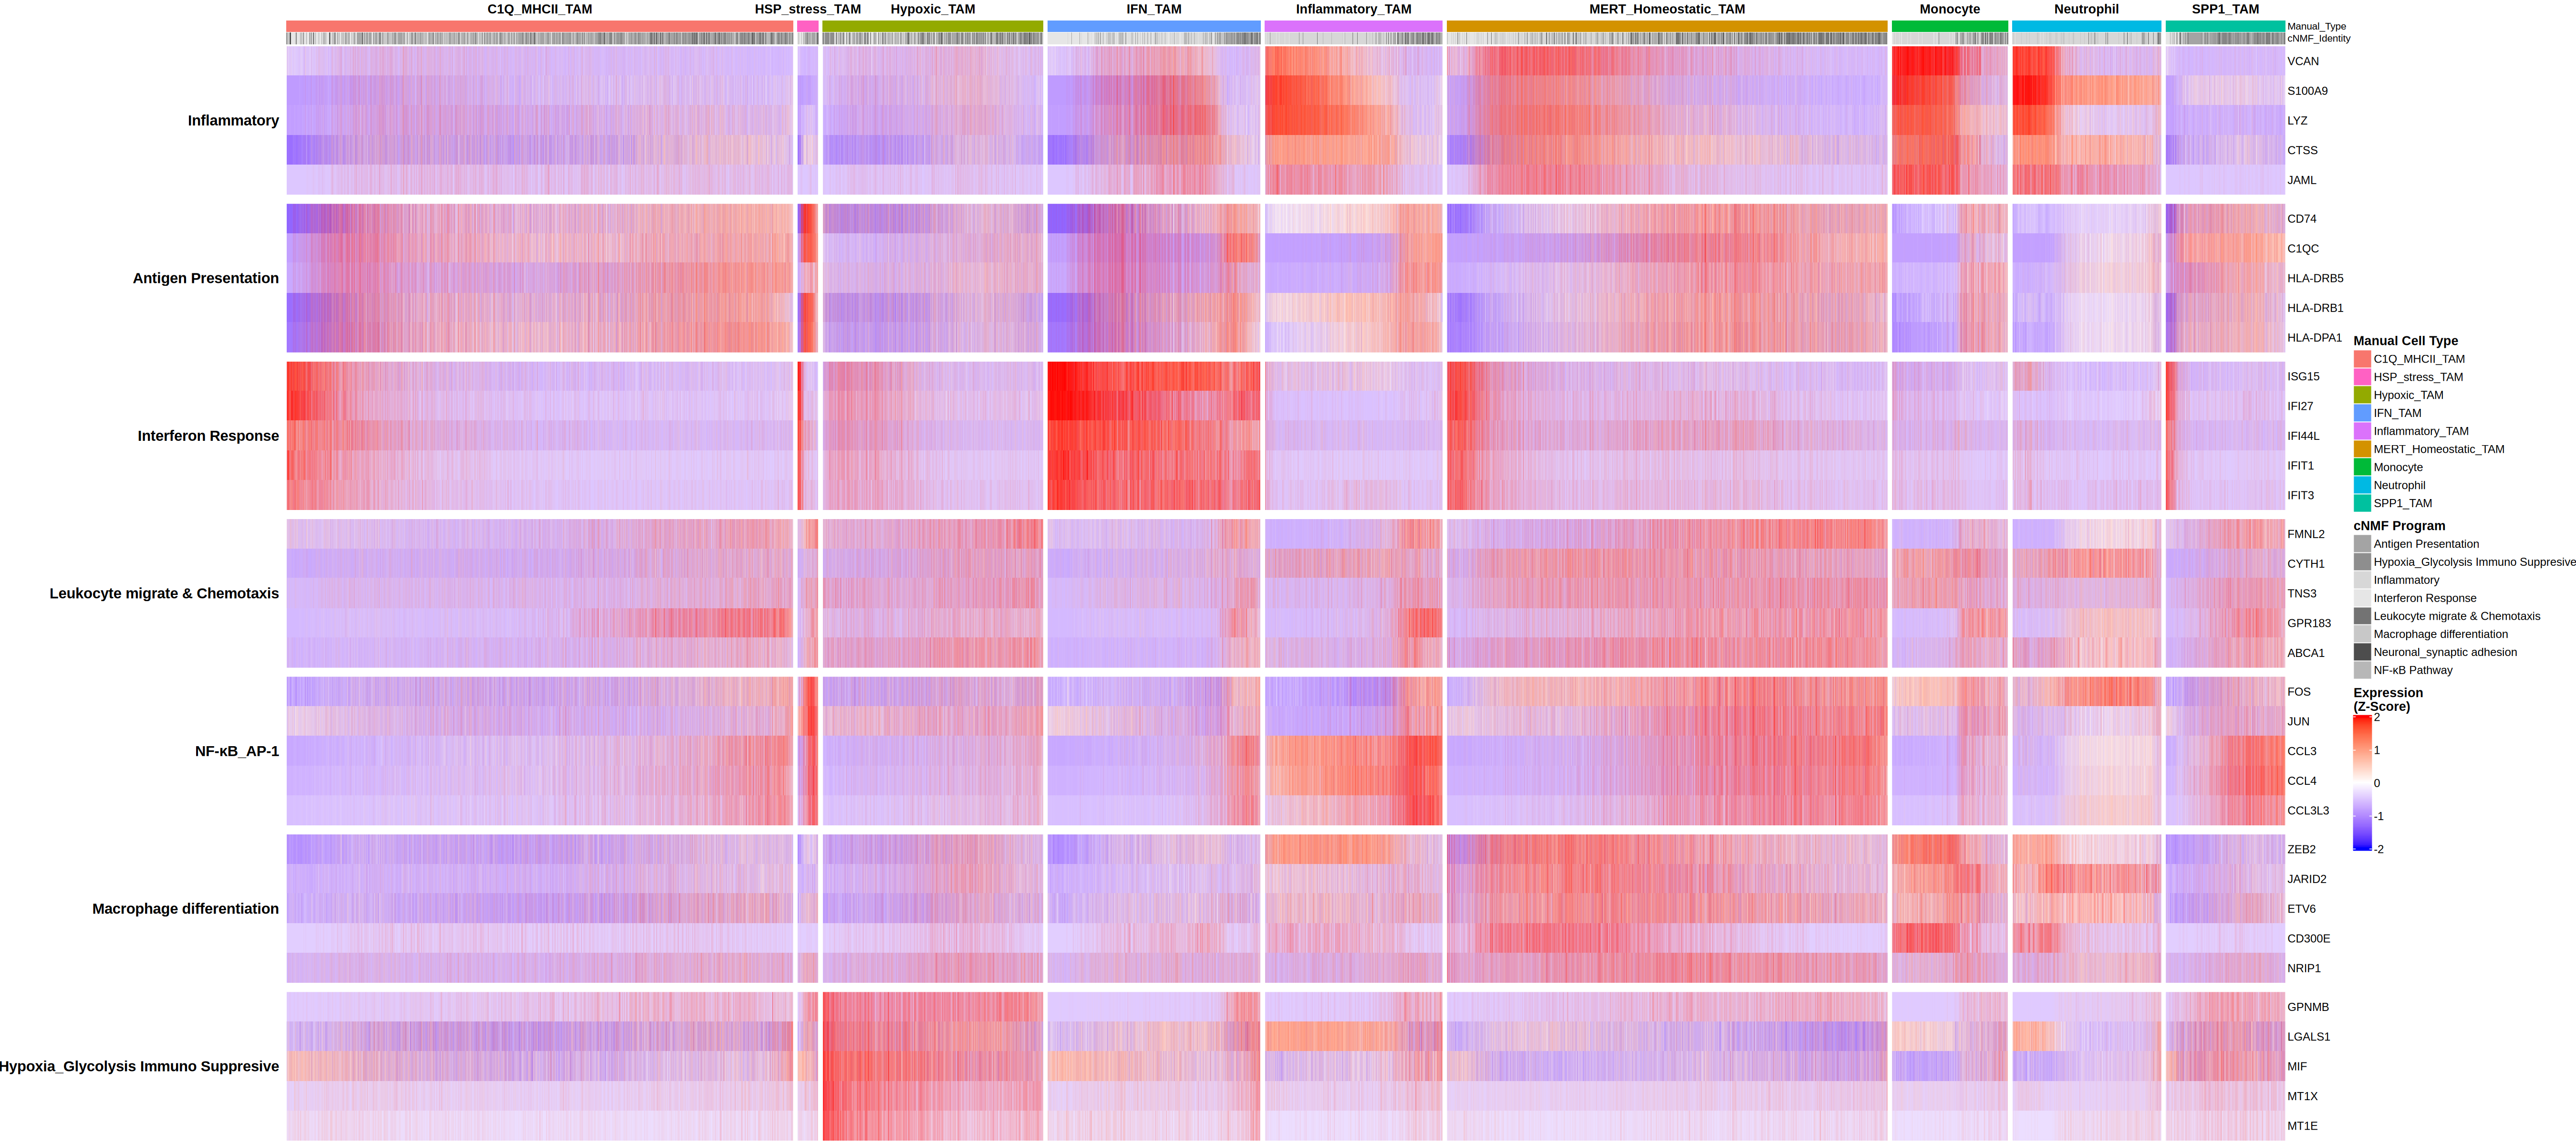

In [38]:
# p_final <- Heatmap(mat_ordered,
#         name = "Z-Score",
        
#         # --- SPLIT BY MANUAL ANNOTATION ---
#         # This groups the heatmap columns by your biological labels
#         column_split = obj$Manual_Identity[cell_order], 
        
#         # --- DISABLE CLUSTERING (Use our custom sort) ---
#         cluster_columns = FALSE, 
#         cluster_rows = FALSE,    # Keep gene groups ordered manually
        
#         # --- ROW SPLITS (Your Custom Programs) ---
#         row_split = gene_groups,
#         row_title_rot = 0,
#         row_gap = unit(2, "mm"),
#         column_gap = unit(1, "mm"),
        
#         # --- AESTHETICS ---
#         show_column_names = FALSE,
#         top_annotation = top_anno[cell_order], # Apply sorted annotation
#         row_names_gp = gpar(fontsize = 9),
#         column_title_gp = gpar(fontsize = 10, fontface = "bold"),
        
#         # Color
#         col = colorRamp2(c(-2, 0, 2), c("blue", "white", "red"))
# )

# # Draw it
# options(repr.plot.width = 28, repr.plot.height = 14)
# draw(p_final, merge_legend = TRUE)
p_final <- Heatmap(mat_ordered,
        name = "Z-Score",
        
        # --- SPLITS ---
        column_split = obj$Manual_Identity[cell_order], 
        row_split = gene_groups,
        
        cluster_columns = FALSE, 
        cluster_rows = FALSE,
        
        row_title_rot = 0,
        row_gap = unit(4, "mm"),    # Increase gap slightly for bigger text
        column_gap = unit(2, "mm"),
        
        # --- AESTHETICS (MODIFIED) ---
        show_column_names = FALSE,
        top_annotation = top_anno[cell_order],
        
        # 1. INCREASE GENE NAME SIZE (Rows)
        row_names_gp = gpar(fontsize = 14), 
        
        # 2. INCREASE PATHWAY NAME SIZE (Row Splits)
        row_title_gp = gpar(fontsize = 18, fontface = "bold"),
        
        # 3. INCREASE CLUSTER NAME SIZE (Columns)
        column_title_gp = gpar(fontsize = 16, fontface = "bold"),
        
        # 4. INCREASE MAIN LEGEND SIZE (Z-Score Bar)
        heatmap_legend_param = list(
            title = "Expression\n(Z-Score)",
            title_gp = gpar(fontsize = 16, fontface = "bold"),
            labels_gp = gpar(fontsize = 14),
            legend_height = unit(6, "cm"), # Make the color bar longer
            grid_width = unit(8, "mm")     # Make the color bar wider
        ),
        
        col = colorRamp2(c(-2, 0, 2), c("blue", "white", "red"))
)

# Draw it
options(repr.plot.width = 45, repr.plot.height = 20)
draw(p_final, merge_legend = TRUE)

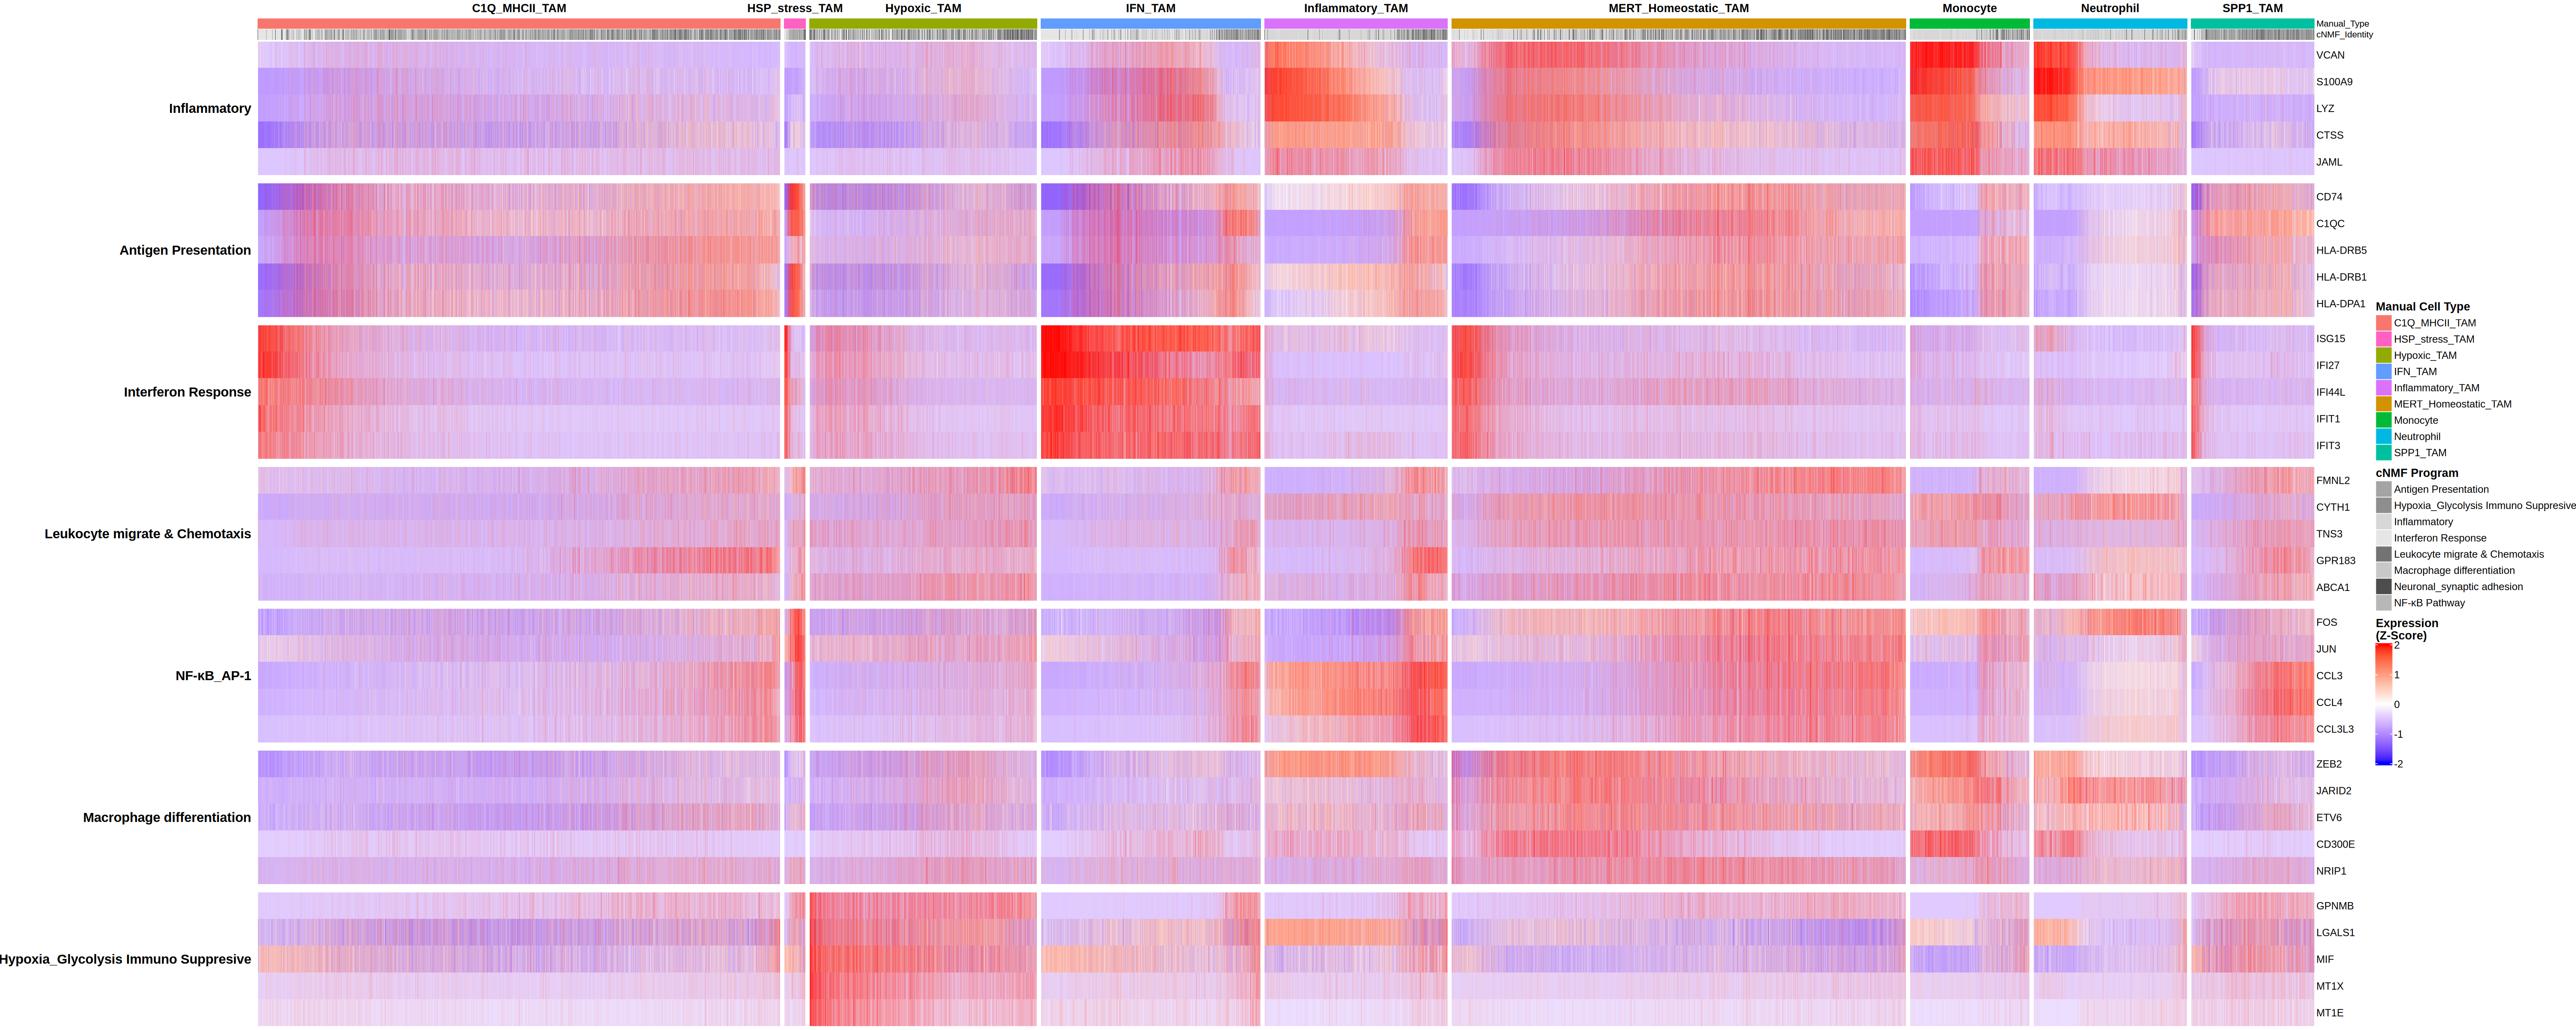

In [43]:
# Draw it
options(repr.plot.width = 50, repr.plot.height = 20)
draw(p_final, merge_legend = TRUE)

In [41]:
saveRDS(myeloid_clean, '/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/subclusters/myeloid/annotated/myeloid_clean_annotated.rds')

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.



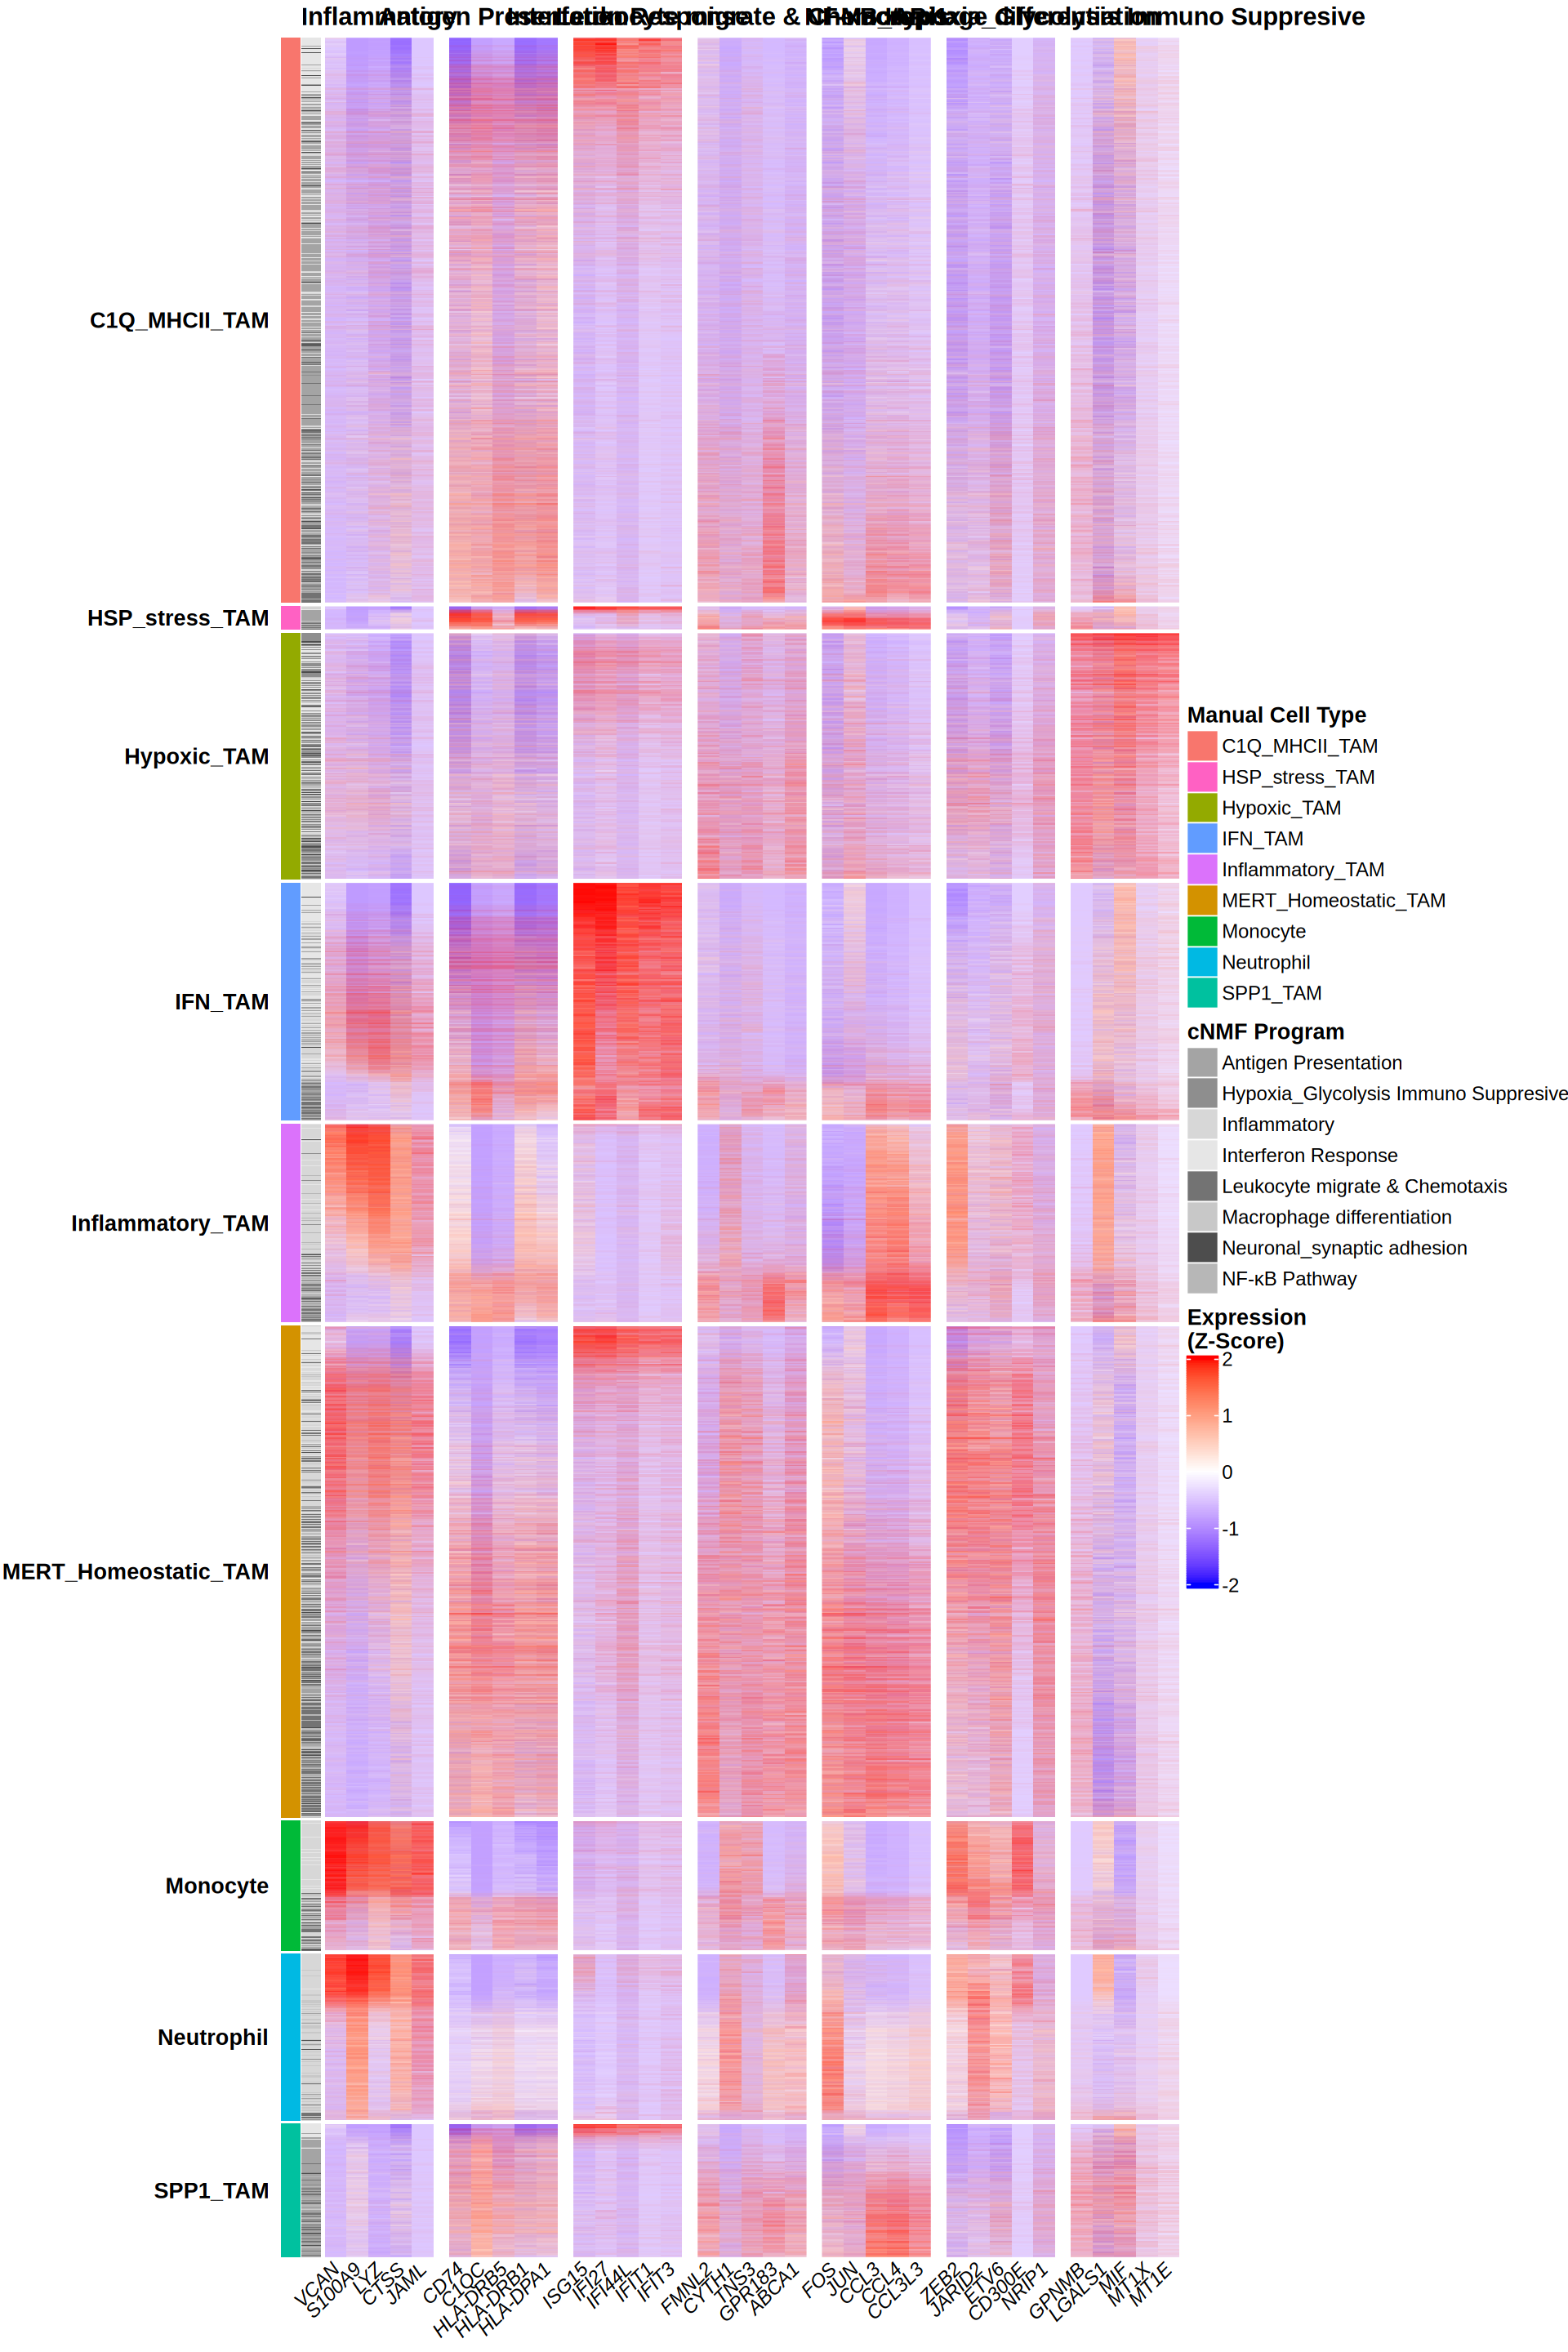

In [102]:
# 1. Transpose the Matrix
# Now Rows = Cells, Columns = Genes
mat_flipped <- t(mat_ordered)

# 2. Define Left Annotation (Instead of Top)
# We use rowAnnotation() instead of HeatmapAnnotation()
left_anno <- rowAnnotation(
  Manual_Type = obj$Manual_Identity[cell_order],
  cNMF_Identity = obj$cNMF_Broad_Identity[cell_order],
  col = list(
    Manual_Type = manual_colors,
    cNMF_Identity = cnmf_colors
  ),
  annotation_legend_param = list(
    Manual_Type = list(
        title = "Manual Cell Type", 
        title_gp = gpar(fontsize = 16, fontface = "bold"),
        labels_gp = gpar(fontsize = 14),
        grid_width = unit(8, "mm"), 
        grid_height = unit(8, "mm")
    ),
    cNMF_Identity = list(
        title = "cNMF Program",
        title_gp = gpar(fontsize = 16, fontface = "bold"),
        labels_gp = gpar(fontsize = 14),
        grid_width = unit(8, "mm"),
        grid_height = unit(8, "mm")
    )
  ),
  show_annotation_name = FALSE
)

# 3. Draw the Vertical Heatmap
p_vertical <- Heatmap(mat_flipped,
        name = "Z-Score",
        
        # --- SWAPPED SPLITS ---
        # Row Split = Cell Types (Manual Identity)
        row_split = obj$Manual_Identity[cell_order], 
        
        # Column Split = Gene Programs
        column_split = gene_groups,
        
        # --- SORTING ---
        cluster_rows = FALSE, 
        cluster_columns = FALSE,
        
        # --- GAPS ---
        row_gap = unit(1, "mm"),      # Small gap between cell types
        column_gap = unit(4, "mm"),   # Bigger gap between programs
        
        # --- AESTHETICS (ADJUSTED FOR VERTICAL) ---
        show_row_names = FALSE,       # Hide Cell Barcodes (Rows)
        show_column_names = TRUE,     # Show Gene Names (Columns)
        
        left_annotation = left_anno,  # Annotation moves to the left
        
        # 1. GENE NAMES (Now on Columns)
        column_names_gp = gpar(fontsize = 14, fontface = "italic"),
        column_names_rot = 45,        # Rotate gene names for readability
        
        # 2. PROGRAM NAMES (Now Column Titles)
        column_title_gp = gpar(fontsize = 18, fontface = "bold"),
        column_title_rot = 0,         # Keep titles horizontal if they fit
        
        # 3. CLUSTER NAMES (Now Row Titles)
        row_title_gp = gpar(fontsize = 16, fontface = "bold"),
        row_title_rot = 0,            # Keep cell type names horizontal
        
        # 4. LEGEND (Same as before)
        heatmap_legend_param = list(
            title = "Expression\n(Z-Score)",
            title_gp = gpar(fontsize = 16, fontface = "bold"),
            labels_gp = gpar(fontsize = 14),
            legend_height = unit(6, "cm"), 
            grid_width = unit(8, "mm")     
        ),
        
        col = colorRamp2(c(-2, 0, 2), c("blue", "white", "red"))
)

# Draw it (Adjust height to be TALLER now)
options(repr.plot.width = 16, repr.plot.height = 24)
draw(p_vertical, merge_legend = TRUE)

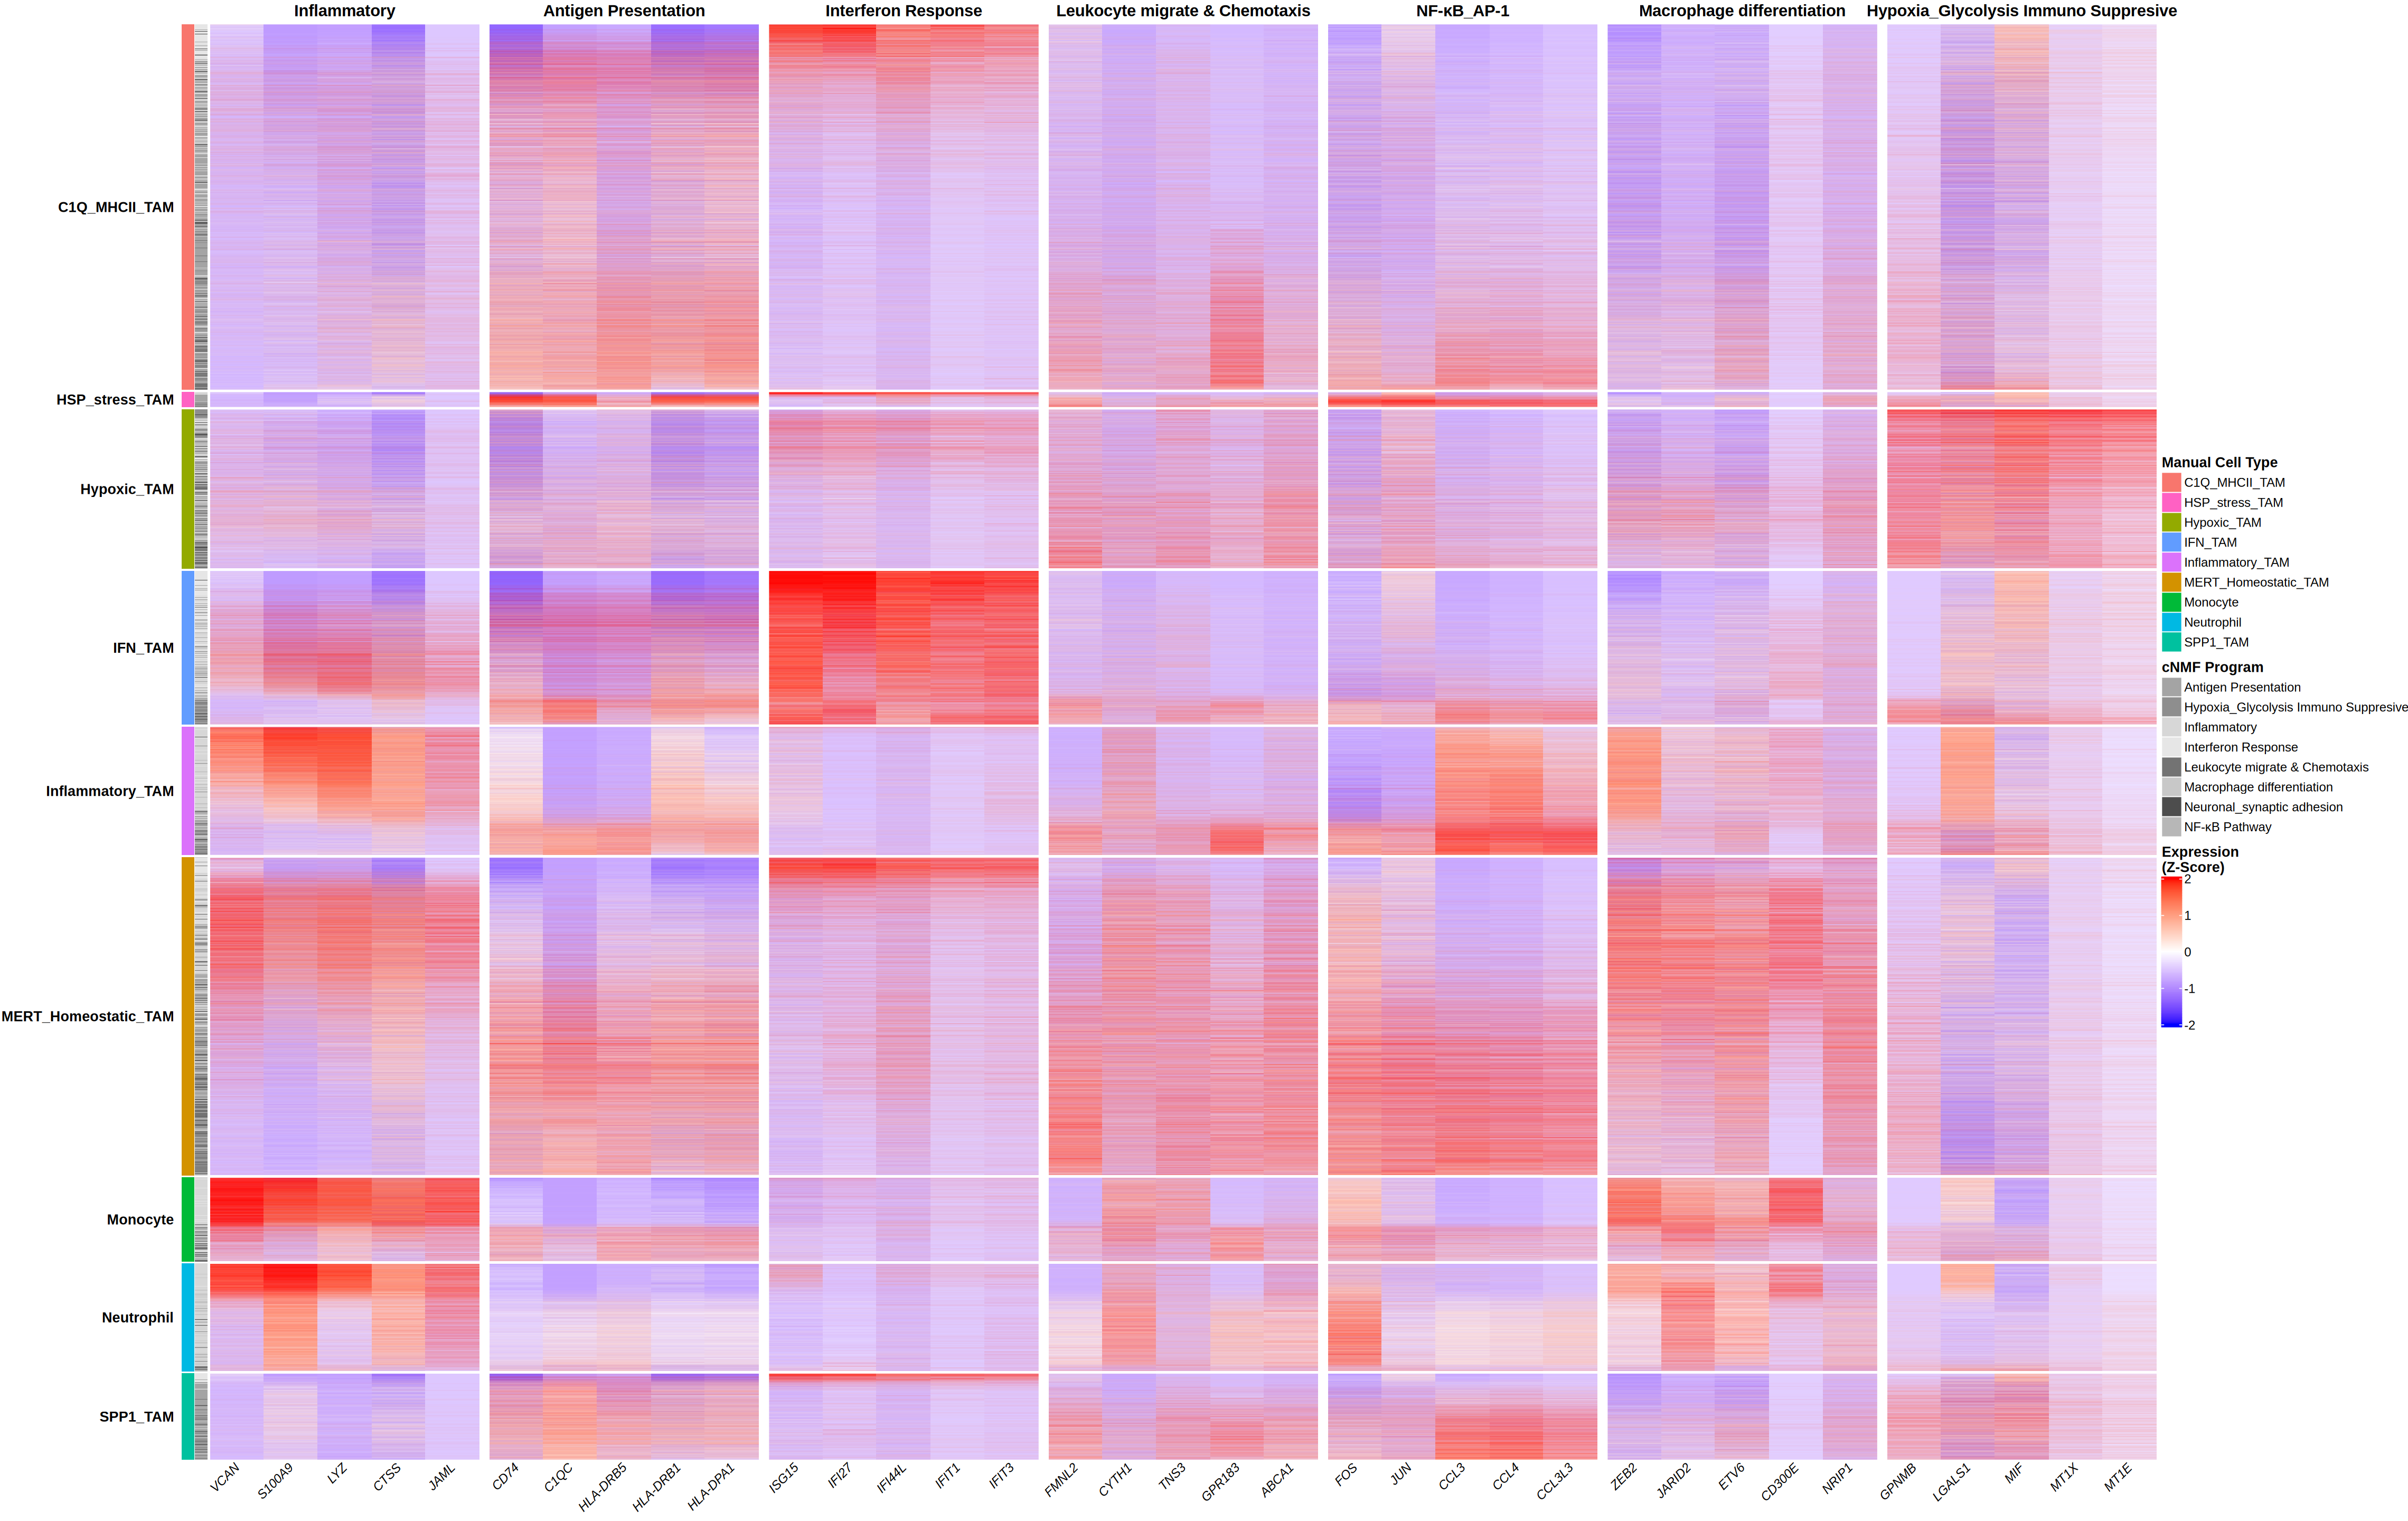

In [104]:
options(repr.plot.width = 38, repr.plot.height = 24)
draw(p_vertical, merge_legend = TRUE)

In [ ]:
# 1. Identify which genes are actually in your Seurat object
# We check against the rownames of the object
valid_heatmap_genes <- intersect(heatmap_genes, rownames(obj_small))

# Check how many you lost (Optional)
missing_genes <- setdiff(heatmap_genes, rownames(obj_small))
if(length(missing_genes) > 0) {
  message("Warning: The following ", length(missing_genes), " genes were not found in the Seurat object and will be skipped:")
  print(head(missing_genes))
}

# 2. Scale ONLY the valid genes
# Explicitly specify the assay ("SCT" or "RNA") to be safe. 
# Since your active assay is SCT, we use that.
obj_small <- ScaleData(obj_small, features = valid_heatmap_genes, assay = "SCT")

# 3. Extract the matrix
# Now this should work because we guarantee every gene in the list exists in the object
mat <- GetAssayData(obj_small, assay = "SCT", layer = "scale.data")[valid_heatmap_genes, ]

# 4. Proceed with the rest of your Heatmap code
# (Trimming outliers, annotation, drawing, etc.)
mat[mat > 2] <- 2
mat[mat < -2] <- -2

In [ ]:
# 4. Prepare Annotation (The Colored Bar at the top)
# This corresponds to the "Identity" blocks in Figure 1C
identity_anno <- HeatmapAnnotation(
  CellType = obj_small$cNMF_Broad_Identity,
  col = list(CellType = c(
    "Myeloid" = "firebrick", 
    "Malignant" = "orange", 
    "Oligodendrocyte" = "green",
    "Vasculature" = "blue",
    "Neuron" = "purple",
    "Cell_Cycle" = "grey",
    "Other" = "black"
  ))
)

# 5. Draw Heatmap
Heatmap(mat,
        name = "Expression",
        column_split = obj_small$cNMF_Broad_Identity, # Split columns by Cell Type
        cluster_rows = FALSE, # Keep programs in order (1 to 18)
        cluster_columns = TRUE, # Cluster cells within their block
        show_column_names = FALSE,
        top_annotation = identity_anno,
        row_names_gp = gpar(fontsize = 8), # Make gene names small
        column_title_gp = gpar(fontsize = 10, fontface = "bold")
)